Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 61

In [1]:
num_days_R_prediction=61

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

### Load Data from Github - John Hopkins Institute 

In [4]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [5]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.373100   
255                               NaN            Sierra Leone   8.460555   
256  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

## Get Population

In [6]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [7]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.916200   
251                          Anguilla          United Kingdom  18.220600   
252            British Virgin Islands          United Kingdom  18.420700   
253          Turks and Caicos Islands          United Kingdom  21.694000   
254                               NaN              MS Zaandam   0.000000   
255                               NaN                Botswana -22.328500   
256                               NaN                 Burundi  -3.373100   
257                               NaN            Sierra Leone   8.460555   
258  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

In [8]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/25/20  \
185        0        0        0        0        0        0  ...      524   
186        0        0        0        0        0        0  ...      880   
187        0        0        0        0        0        0  ...       10   
188        0        0        0        0        0        0  ...      601   
189        0        0        0        0        0        0  ...      681   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       40   
194        0        0        0        0        0        0  ...      136   

     4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  \
185      535      562      596      624      644     651     664   
186      903      928      948      973      989    1007    1023   
187       10       10       10       10       10      12      12   
188      619      641      663      693      717     744     771   
189      747      794      867      972     1073    1169    1222   
190        0        0        0        0        0       0       0   
191        0        0        0        0        0       0       0   
192        0        0        0        0        0       0       0   
193       41       41       41       41       41      41      41   
194      139      144      152      157      162     169     176   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 108 columns]

In [9]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/25/20  4/26/20  4/27/20  \
175        0        0        0        0  ...      329      333      364   
176        0        0        0        0  ...     2866     2936     3029   
177        0        0        0        0  ...      338      338      455   
178        0        0        0        0  ...        0        0        0   
179        0        0        0        0  ...       85       85       93   
180        0        0        0        0  ...     7797     8088     8425   
181        0        0        0        0  ...      792      862      932   
182        0        0        0        0  ...     2126     2265     2466   
183        0        0        0        0  ...     1277     1329     1357   
184        0        0        0        0  ...      929     1012     1066   

     4/28/20  4/29/20  4/30/20  5/1/20  5/2/20   Population   \
175      364      364      495     495     750     4,636,000   
176     3233     3425     4315    4715    4817   197,000,000   
177      455      527      576     622     641     4,299,739   
178        0        0        0       0       0           NaN   
179      102      102      113     115     119     7,111,652   
180     9179    10037    10405   11129   12434    32,870,710   
181      975     1023     1043    1084    1124   104,900,000   
182     2655     3025     3236    3491    3762    37,980,000   
183     1389     1470     1519    1647    1671    10,290,000   
184     1134     1243     1372    1436    1534     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 108 columns]

In [10]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/25/20  \
185        0        0        0        0        0        0  ...    11273   
186        0        0        0        0        0        0  ...    23392   
187        0        0        0        0        0        0  ...     9358   
188        0        0        0        0        0        0  ...    10635   
189        0        0        0        0        0        0  ...    74588   
190        0        0        0        0        0        0  ...      183   
191        0        0        0        0        0        0  ...       15   
192        0        0        0        0        0        0  ...       14   
193        0        0        0        0        0        0  ...      513   
194        0        0        0        0        0        0  ...    16299   

     4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  5/2/20  \
185    11617    11902    12218    12640    12877   13105   13375   
186    23864    24027    24322    24505    25045   25351   25190   
187    10287    11244    11921    12564    13409   14096   14872   
188    11036    11339    11616    11978    12240   12567   12732   
189    80949    87147    93558    99399   106498  114431  124054   
190      191      207      212      225      243     249     255   
191       15       15       15       17       17      17      17   
192       14       15       15       16       16      16      16   
193      538      538      553      563      569     580     580   
194    17522    18811    20077    21402    22753   24097   25459   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 108 columns]

In [11]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/25/20  4/26/20  4/27/20  \
220        0        0        0        0  ...       70       70       70   
221        0        0        0        0  ...      525      525      525   
222        0        0        0        0  ...      136      141      141   
223        0        0        0        0  ...      308      308      308   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   148377   152840   157149   
226        0        0        0        0  ...      596      606      620   
227        2        2        5        5  ...   938154   965785   988197   
228        0        0        0        0  ...     1862     1869     1904   
229        0        0        0        0  ...      323      325      329   

     4/28/20  4/29/20  4/30/20   5/1/20   5/2/20   Population   \
220       70       73       73       74       74           NaN   
221      530      537      537      538      543       173,519   
222      141      141      144      144      144        33,693   
223      309      313      315      316      320        84,939   
224       11       11       11       11       11         4,991   
225   161145   165221   171253   177454   182260    66,440,000   
226      625      630      643      648      652     3,471,150   
227  1012582  1039909  1069424  1103461  1132539   327,200,000   
228     1939     2002     2039     2086     2118    33,363,556   
229      329      331      333      335      345           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 108 columns]

## Create Time Series + Plots

In [12]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [13]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [14]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

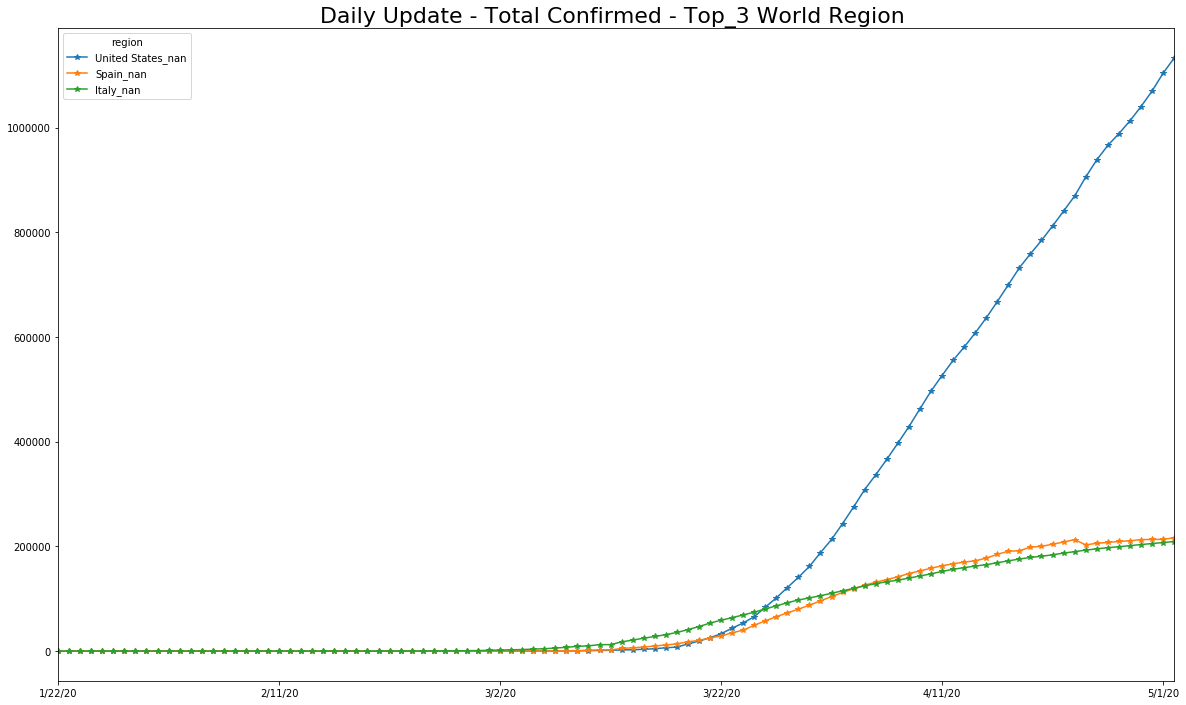

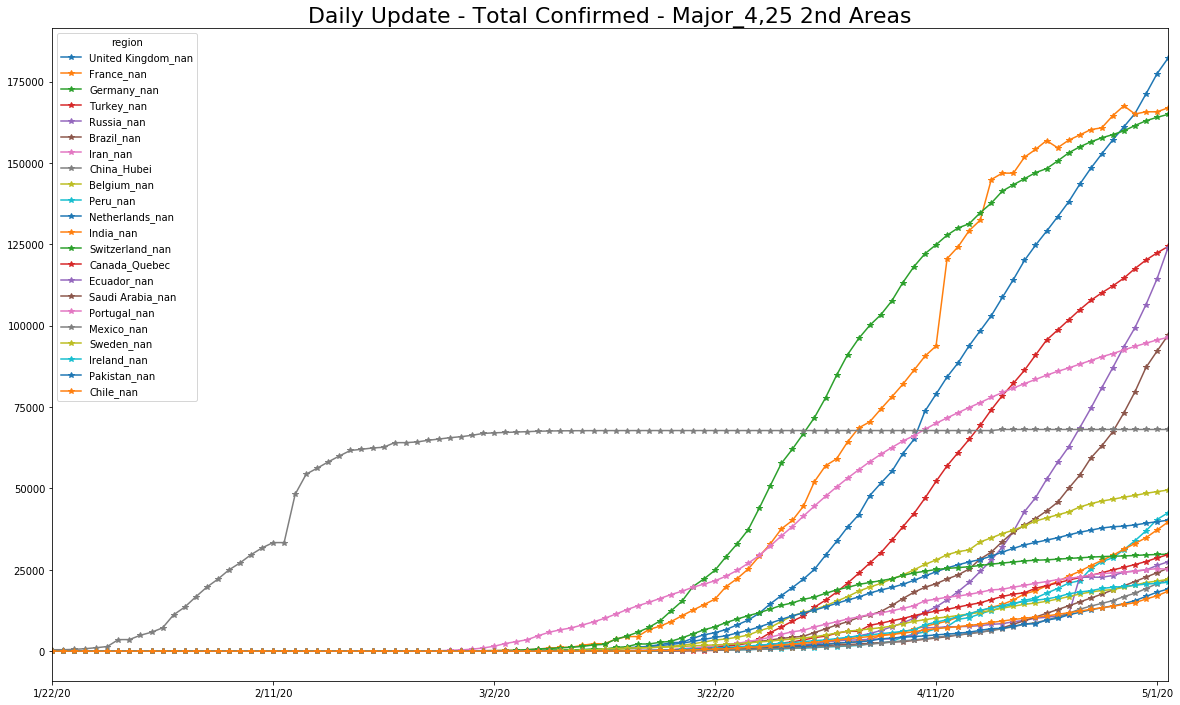

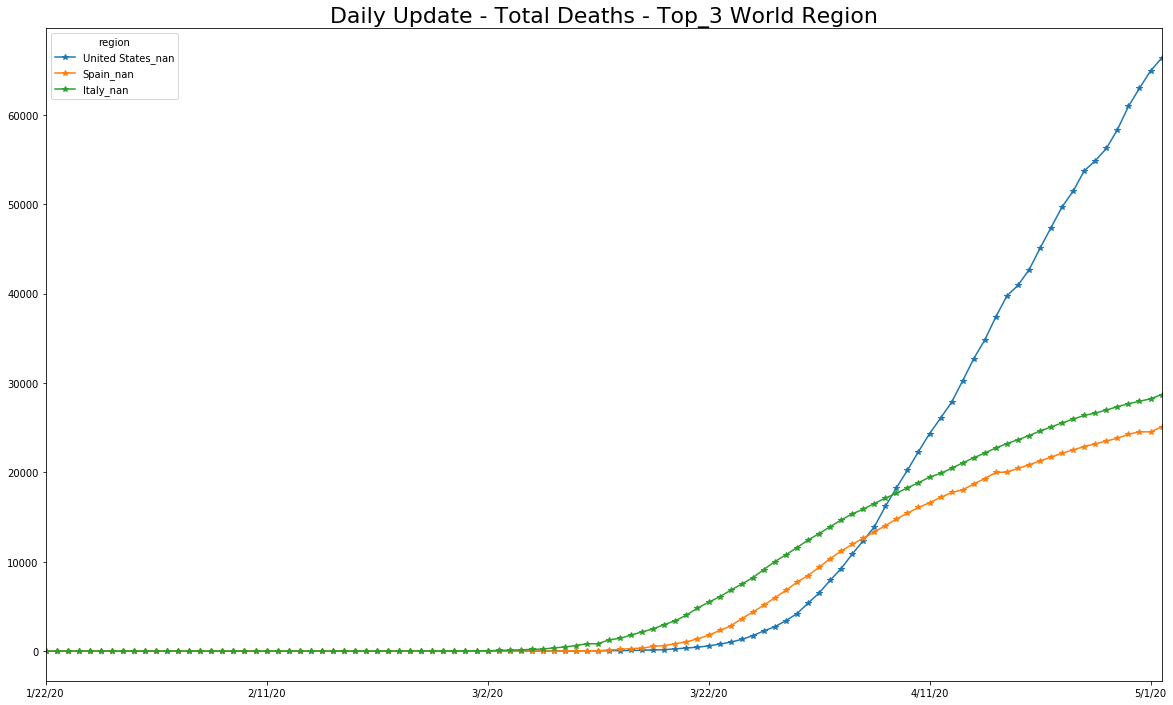

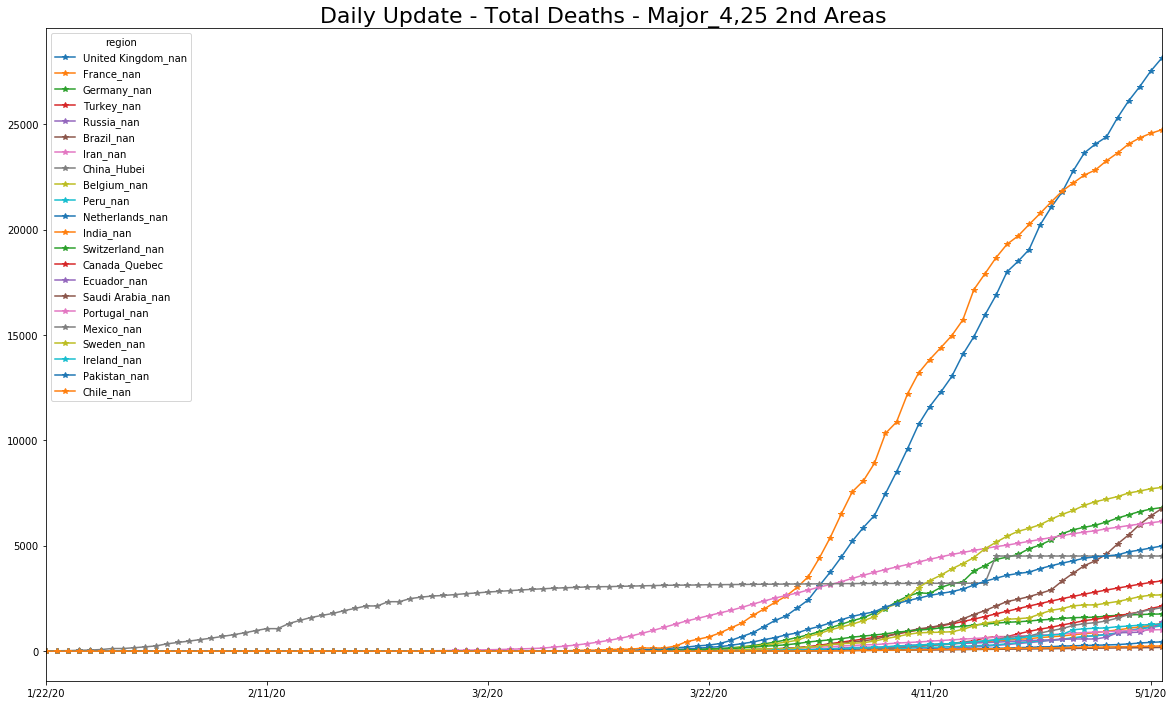

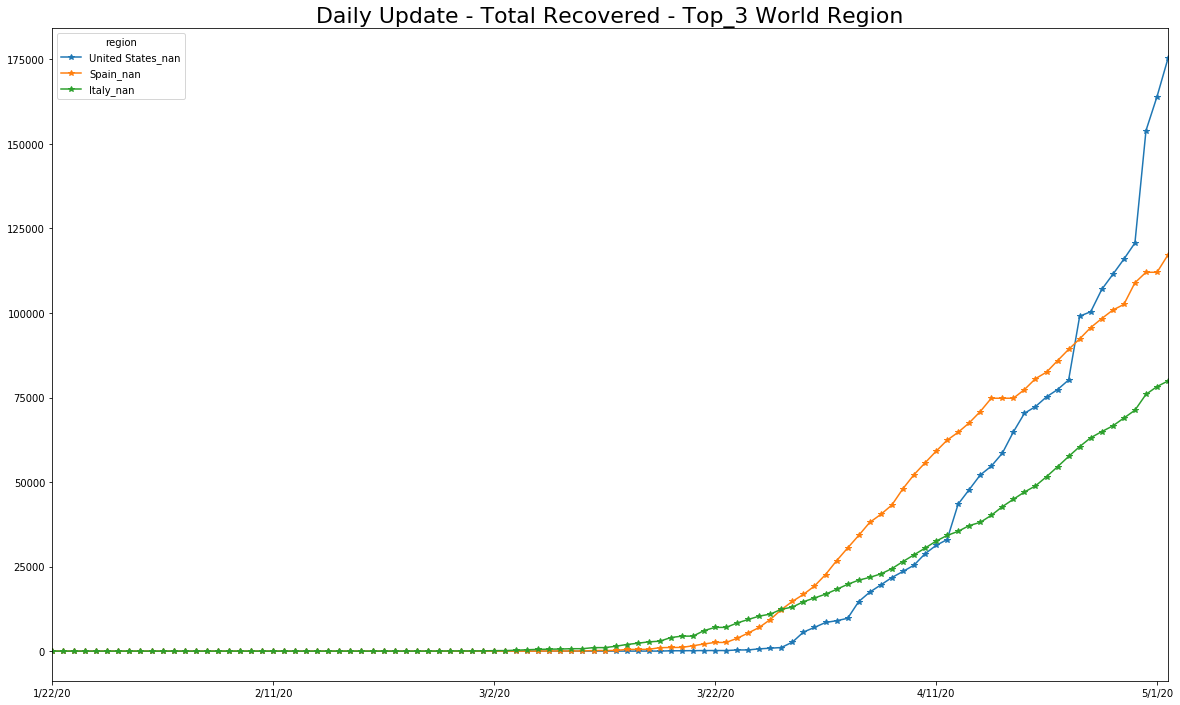

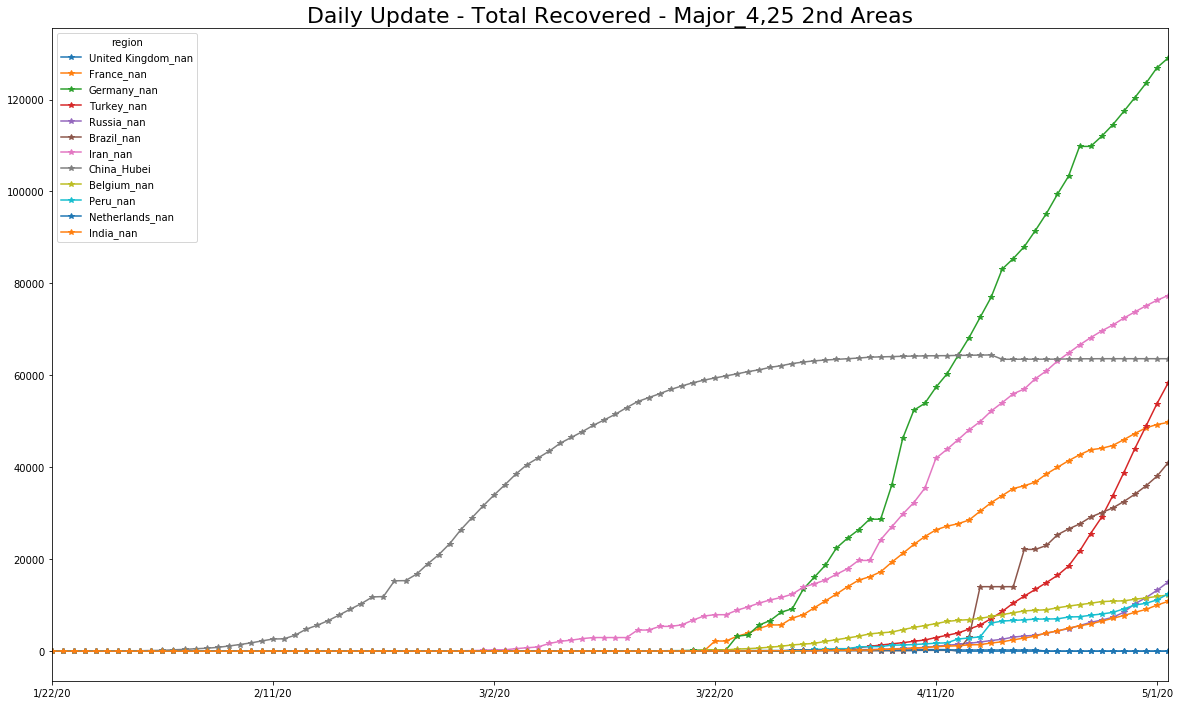

In [15]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [16]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [17]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [18]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/05/03


In [19]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [20]:
w[:]

date                     region   min   max
0   2020/05/04  Australia_New South Wales  11.9  17.9
1   2020/05/04                Belgium_nan   3.9  15.0
2   2020/05/04                 Brazil_nan  13.3  20.0
3   2020/05/04             Canada_Ontario  -0.6   4.8
4   2020/05/04              Canada_Quebec  -1.0   0.0
5   2020/05/04              China_Beijing  19.0  25.0
6   2020/05/04            China_Guangdong  25.0  34.0
7   2020/05/04            China_Hong Kong  21.7  28.1
8   2020/05/04                China_Hubei  22.0  34.0
9   2020/05/04                China_Macau  24.8  30.0
10  2020/05/04             China_Shanghai  21.1  33.9
11  2020/05/04                Finland_nan   3.3   8.9
12  2020/05/04                 France_nan  12.4  14.3
13  2020/05/04                Germany_nan   4.2  14.0
14  2020/05/04                  India_nan  25.0  43.0
15  2020/05/04                   Iran_nan  11.0  23.0
16  2020/05/04                  Italy_nan  10.8  21.7
17  2020/05/04                  Japan_nan  12.9  24.4
18  2020/05/04           Korea, South_nan  14.2  20.0
19  2020/05/04               Malaysia_nan  23.7  33.0
20  2020/05/04            Netherlands_nan  11.1  19.4
21  2020/05/04                 Norway_nan  -3.9   0.0
22  2020/05/04            Philippines_nan  27.2  32.8
23  2020/05/04                 Poland_nan   7.2  13.3
24  2020/05/04               Portugal_nan  12.3  28.9
25  2020/05/04                 Russia_nan   4.0  19.0
26  2020/05/04              Singapore_nan  26.5  33.5
27  2020/05/04                  Spain_nan  11.8  28.8
28  2020/05/04                 Sweden_nan   4.4  11.7
29  2020/05/04            Switzerland_nan   5.7  12.9
30  2020/05/04                Taiwan*_nan  21.0  35.0
31  2020/05/04                 Turkey_nan   7.1  17.8
32  2020/05/04         United Kingdom_nan   5.0  12.2
33  2020/05/04          United States_nan  19.9  22.4
34  2020/05/04                Vietnam_nan  25.0  32.0

## Kalman Filter With R

In [21]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

#ts=ts[29:]
#ts_d=ts_d[29:]
#ts_rec=ts_rec[29:]

In [22]:
ts[-4:-1]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/29/20             1939          766         3848          743          27   
4/30/20             2171          773         4006          745          27   
5/1/20              2335          782         4154          745          30   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/29/20                       24           4285         1932   
4/30/20                       24           4428         2066   
5/1/20                        25           4532         2148   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
4/29/20                                     106                       3016   
4/30/20                                     106                       3025   
5/1/20                                      106                       3030   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
4/29/20  ...            1039909          630            2002            331   
4/30/20  ...            1069424          643            2039            333   
5/1/20   ...            1103461          648            2086            335   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
4/29/20          270                     344                   6          6   
4/30/20          270                     344                   6          6   
5/1/20           270                     353                   6          7   

region   Zambia_nan  Zimbabwe_nan  
4/29/20          97            32  
4/30/20         106            40  
5/1/20          109            40  

[3 rows x 266 columns]

In [23]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [24]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
w_in_model.tail(2)

date       region   min   max
6654 2020-05-03  Vietnam_nan  25.8  32.0
6655 2020-05-04  Vietnam_nan  25.0  32.0

### Build Train Set Data Structure

In [32]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [34]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
34    2020-02-25  Afghanistan_nan          1             1             1   
35    2020-02-26  Afghanistan_nan          1             0             1   
36    2020-02-27  Afghanistan_nan          1             0             1   
37    2020-02-28  Afghanistan_nan          1             0             0   
38    2020-02-29  Afghanistan_nan          1             0             0   
39    2020-03-01  Afghanistan_nan          1             0             0   
40    2020-03-02  Afghanistan_nan          1             0             0   
41    2020-03-03  Afghanistan_nan          1             0             0   
42    2020-03-04  Afghanistan_nan          1             0             0   
43    2020-03-05  Afghanistan_nan          1             0             0   
44    2020-03-06  Afghanistan_nan          1             0             0   
45    2020-03-07  Afghanistan_nan          1             0             0   
46    2020-03-08  Afghanistan_nan          4             0             0   
47    2020-03-09  Afghanistan_nan          4             3             3   
48    2020-03-10  Afghanistan_nan          5             0             3   
49    2020-03-11  Afghanistan_nan          7             1             4   
50    2020-03-12  Afghanistan_nan          7             2             3   
51    2020-03-13  Afghanistan_nan          7             0             3   
52    2020-03-14  Afghanistan_nan         11             0             2   
53    2020-03-15  Afghanistan_nan         16             4             4   
54    2020-03-16  Afghanistan_nan         21             5             9   
55    2020-03-17  Afghanistan_nan         22             5            14   
56    2020-03-18  Afghanistan_nan         22             1            11   
57    2020-03-19  Afghanistan_nan         22             0             6   
58    2020-03-20  Afghanistan_nan         24             0             1   
59    2020-03-21  Afghanistan_nan         24             2             2   
60    2020-03-22  Afghanistan_nan         40             0             2   
61    2020-03-23  Afghanistan_nan         40            16            18   
62    2020-03-24  Afghanistan_nan         74             0            16   
63    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
27574 2020-04-04     Zimbabwe_nan          9             0             1   
27575 2020-04-05     Zimbabwe_nan          9             0             1   
27576 2020-04-06     Zimbabwe_nan         10             0             0   
27577 2020-04-07     Zimbabwe_nan         11             1             1   
27578 2020-04-08     Zimbabwe_nan         11             1             2   
27579 2020-04-09     Zimbabwe_nan         11             0             2   
27580 2020-04-10     Zimbabwe_nan         13             0             1   
27581 2020-04-11     Zimbabwe_nan         14             2             2   
27582 2020-04-12     Zimbabwe_nan         14             1             3   
27583 2020-04-13     Zimbabwe_nan         17             0             3   
27584 2020-04-14     Zimbabwe_nan         17             3             4   
27585 2020-04-15     Zimbabwe_nan         23             0             3   
27586 2020-04-16     Zimbabwe_nan         23             6             9   
27587 2020-04-17     Zimbabwe_nan         24             0             6   
27588 2020-04-18     Zimbabwe_nan         25             1             7   
27589 2020-04-19     Zimbabwe_nan         25             1             2   
27590 2020-04-20     Zimbabwe_nan         25             0             2   
27591 2020-04-21     Zimbabwe_nan         28             0             1   
27592 2020-04-22     Zimbabwe_nan         28             3             3   
27593 2020-04-23     Zimbabwe_nan         28             0             3   
27594 2020-04-24     Zimbabwe_nan         29             0  

In [35]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [36]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date           region  confirmed  1_day_change  3_day_change  \
0     2020-01-22  Afghanistan_nan          0             0             0   
1     2020-01-23  Afghanistan_nan          0             0             0   
2     2020-01-24  Afghanistan_nan          0             0             0   
3     2020-01-25  Afghanistan_nan          0             0             0   
4     2020-01-26  Afghanistan_nan          0             0             0   
5     2020-01-27  Afghanistan_nan          0             0             0   
6     2020-01-28  Afghanistan_nan          0             0             0   
7     2020-01-29  Afghanistan_nan          0             0             0   
8     2020-01-30  Afghanistan_nan          0             0             0   
9     2020-01-31  Afghanistan_nan          0             0             0   
10    2020-02-01  Afghanistan_nan          0             0             0   
11    2020-02-02  Afghanistan_nan          0             0             0   
12    2020-02-03  Afghanistan_nan          0             0             0   
13    2020-02-04  Afghanistan_nan          0             0             0   
14    2020-02-05  Afghanistan_nan          0             0             0   
15    2020-02-06  Afghanistan_nan          0             0             0   
16    2020-02-07  Afghanistan_nan          0             0             0   
17    2020-02-08  Afghanistan_nan          0             0             0   
18    2020-02-09  Afghanistan_nan          0             0             0   
19    2020-02-10  Afghanistan_nan          0             0             0   
20    2020-02-11  Afghanistan_nan          0             0             0   
21    2020-02-12  Afghanistan_nan          0             0             0   
22    2020-02-13  Afghanistan_nan          0             0             0   
23    2020-02-14  Afghanistan_nan          0             0             0   
24    2020-02-15  Afghanistan_nan          0             0             0   
25    2020-02-16  Afghanistan_nan          0             0             0   
26    2020-02-17  Afghanistan_nan          0             0             0   
103   2020-01-22      Albania_nan          0             0             0   
104   2020-01-23      Albania_nan          0             0             0   
105   2020-01-24      Albania_nan          0             0             0   
...          ...              ...        ...           ...           ...   
27574 2020-04-04     Zimbabwe_nan          9             0             1   
27575 2020-04-05     Zimbabwe_nan          9             0             1   
27576 2020-04-06     Zimbabwe_nan         10             0             0   
27577 2020-04-07     Zimbabwe_nan         11             1             1   
27578 2020-04-08     Zimbabwe_nan         11             1             2   
27579 2020-04-09     Zimbabwe_nan         11             0             2   
27580 2020-04-10     Zimbabwe_nan         13             0             1   
27581 2020-04-11     Zimbabwe_nan         14             2             2   
27582 2020-04-12     Zimbabwe_nan         14             1             3   
27583 2020-04-13     Zimbabwe_nan         17             0             3   
27584 2020-04-14     Zimbabwe_nan         17             3             4   
27585 2020-04-15     Zimbabwe_nan         23             0             3   
27586 2020-04-16     Zimbabwe_nan         23             6             9   
27587 2020-04-17     Zimbabwe_nan         24             0             6   
27588 2020-04-18     Zimbabwe_nan         25             1             7   
27589 2020-04-19     Zimbabwe_nan         25             1             2   
27590 2020-04-20     Zimbabwe_nan         25             0             2   
27591 2020-04-21     Zimbabwe_nan         28             0             1   
27592 2020-04-22     Zimbabwe_nan         28             3             3   
27593 2020-04-23     Zimbabwe_nan         28             0             3   
27594 2020-04-24     Zimbabwe_nan         29             0  

In [37]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=train
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percent_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

In [38]:
# Joao - Fix - Nulls are an issue
train=ratiod
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
27603 2020-05-03  Zimbabwe_nan          0            -6             2   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
27603             3             85.025          106.28125         109.709677   

       last_day  kalman_prediction  population  infected_rate  min  max  \
27603        34               38.0    10000000   3.500000e-08  NaN  NaN   

       population_percent_infected_rate_confirmed  delta_new_cases  \
27603                                    0.000003              4.0   

       delta_new_cases_per_1M_hab  
27603                         0.4

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse           mae
256  United States_nan  1.319880e+10  114886.027167  14444.784314


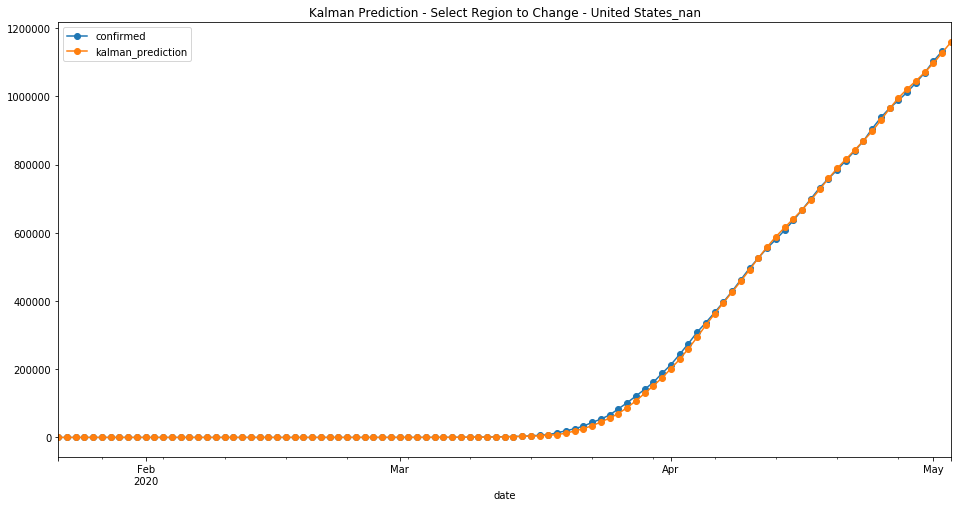

In [39]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [40]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         1 day 20 hours 27 mins
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 6 months and 6 days !!!
H2O cluster name:           H2O_from_python_unknownUser_dnn65h
H2O cluster total nodes:    1
H2O cluster free memory:    2.480 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [41]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-45)).strftime('%Y-%m-%d')
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*100,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-03-19
last_train_date= 2020-05-02
first_bootstrap_date= 2020-04-24
boost_bootstrap_date= 2020-04-29
first_test_date= 2020-04-23
last_test_date= 2020-05-03
first_valid_date= 2020-05-01


In [42]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [43]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [44]:
pred2.iloc[175:195]

0  confirmed       date          region
175  1751.0       1766 2020-04-29  Azerbaijan_nan
176  1806.0       1804 2020-04-30  Azerbaijan_nan
177  1842.0       1854 2020-05-01  Azerbaijan_nan
178  1894.0       1894 2020-05-02  Azerbaijan_nan
179  1934.0          0 2020-05-03  Azerbaijan_nan
180    72.0         73 2020-04-24     Bahamas_nan
181    72.0         78 2020-04-25     Bahamas_nan
182    79.0         80 2020-04-26     Bahamas_nan
183    80.0         80 2020-04-27     Bahamas_nan
184    78.0         80 2020-04-28     Bahamas_nan
185    77.0         80 2020-04-29     Bahamas_nan
186    77.0         81 2020-04-30     Bahamas_nan
187    77.0         81 2020-05-01     Bahamas_nan
188    78.0         83 2020-05-02     Bahamas_nan
189    79.0          0 2020-05-03     Bahamas_nan
190  2322.0       2518 2020-04-24     Bahrain_nan
191  2728.0       2588 2020-04-25     Bahrain_nan
192  2726.0       2647 2020-04-26     Bahrain_nan
193  2724.0       2723 2020-04-27     Bahrain_nan
194  2813.0       2811 2020-04-28     Bahrain_nan

In [45]:
pred2.iloc[220:240]

0  confirmed       date       region
220   8696.0       8773 2020-04-24  Belarus_nan
221   9435.0       9590 2020-04-25  Belarus_nan
222  10452.0      10463 2020-04-26  Belarus_nan
223  11548.0      11289 2020-04-27  Belarus_nan
224  12092.0      12208 2020-04-28  Belarus_nan
225  13112.0      13181 2020-04-29  Belarus_nan
226  14179.0      14027 2020-04-30  Belarus_nan
227  14976.0      14917 2020-05-01  Belarus_nan
228  15873.0      15828 2020-05-02  Belarus_nan
229  16799.0          0 2020-05-03  Belarus_nan
230  43815.0      44293 2020-04-24  Belgium_nan
231  45582.0      45325 2020-04-25  Belgium_nan
232  46577.0      46134 2020-04-26  Belgium_nan
233  47158.0      46687 2020-04-27  Belgium_nan
234  47410.0      47334 2020-04-28  Belgium_nan
235  48058.0      47859 2020-04-29  Belgium_nan
236  48558.0      48519 2020-04-30  Belgium_nan
237  49293.0      49032 2020-05-01  Belgium_nan
238  49592.0      49517 2020-05-02  Belgium_nan
239  49983.0          0 2020-05-03  Belgium_nan

In [46]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  873432.1322283042
# MSE on the validation data =  10699244737.20994
# R^2 on the training data =  0.9999672538493644
# R^2 on the validation data 0.5773627978438898


In [48]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1588346894510_7


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 873432.1322283042
RMSE: 934.5759103616485
MAE: 84.75707200913564
RMSLE: 0.0954569624618214
Mean Residual Deviance: 873432.1322283042

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 10699244737.20994
RMSE: 103437.15356297242
MAE: 26774.714758698447
RMSLE: 5.731277336252942
Mean Residual Deviance: 10699244737.20994
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-05-03 11:55:34  0.009 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-05-03 11:55:34  0.069 sec   1.0                2775.605014115695   207.39136119403446  7703983.194384189    118193.33242573544  28792.314488002234  13969663829.900404
     2020-05-03 11:55:34  0.105 sec   2.0                2369.98473636383    197.63500807077546  5616827.650597532    118156.8282196345   28563.92658749535   13961036054.924213
     2020-05-03 11:55:34  0.143 sec   3.0                2161.49266881998    183.0379073032642   4672050.557362519    117068.6675713783   28539.700264679443  13705072926.937881
     2020-05-03 11:55:34  0.183 sec   4.0                2239.0818326204917  186.69659858578433  5013487.4531711405   117454.74969523792  28567.71586071196   13795618225.970991
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-05-03 11:55:42  7.944 sec   126.0              1127.399452099549   96.85074259154437   1271029.5245943635   109070.52810764092  27410.4224992817    11896380101.679686
     2020-05-03 11:55:46  11.955 sec  211.0              941.0761306253519   88.97981365681619   885624.2836327843    106334.83917866356  27128.285254441565  11307098023.152245
     2020-05-03 11:55:50  15.967 sec  321.0              965.5924652781869   87.48215759721847   932368.8090020064    105640.31267325803  27020.365925417285  11159875661.703722
     2020-05-03 11:55:54  19.974 sec  432.0              943.168194578095    84.90130114394572   889566.2432637033    103873.03208918344  26814.215911382176  10789606795.400532
     2020-05-03 11:55:57  23.196 sec  500.0              934.5759103616485   84.75707200913564   873432.1322283042    103437.15356297242  26774.714758698447  10699244737.20994


See the whole table with table.as_data_frame()
Variable Importances: 


variable                                    relative_importance    scaled_importance    percentage
------------------------------------------  ---------------------  -------------------  ------------
kalman_prediction                           6.11502e+16            1                    0.347059
last_day                                    3.87498e+16            0.633682             0.219925
7_day_change                                2.94765e+16            0.482034             0.167294
delta_new_cases                             1.98209e+16            0.324135             0.112494
3_day_change                                1.07118e+16            0.175171             0.0607948
1_day_change                                8.27707e+15            0.135356             0.0469766
region                                      5.41929e+15            0.0886226            0.0307573
infected_rate                               1.09848e+15            0.0179636            0.00623444
population_percent_infected_rate_confirmed  9.9652e+14             0.0162963            0.00565576
delta_new_cases_per_1M_hab                  1.86691e+14            0.003053             0.00105957
1_day_change_rate                           8.55552e+13            0.0013991            0.00048557
max                                         7.77632e+13            0.00127168           0.000441346
7_day_change_rate                           6.91431e+13            0.00113071           0.000392423
min                                         4.20956e+13            0.000688396          0.000238914
3_day_change_rate                           3.36766e+13            0.000550719          0.000191132

In [49]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  \
0                            kalman_prediction         6.115019e+16   
1                                     last_day         3.874976e+16   
2                                 7_day_change         2.947650e+16   
3                              delta_new_cases         1.982093e+16   
4                                 3_day_change         1.071176e+16   
5                                 1_day_change         8.277067e+15   
6                                       region         5.419291e+15   
7                                infected_rate         1.098480e+15   
8   population_percent_infected_rate_confirmed         9.965195e+14   
9                   delta_new_cases_per_1M_hab         1.866912e+14   
10                           1_day_change_rate         8.555519e+13   
11                                         max         7.776318e+13   
12                           7_day_change_rate         6.914311e+13   
13                                         min         4.209556e+13   
14                           3_day_change_rate         3.367657e+13   

    scaled_importance  percentage  
0            1.000000    0.347059  
1            0.633682    0.219925  
2            0.482034    0.167294  
3            0.324135    0.112494  
4            0.175171    0.060795  
5            0.135356    0.046977  
6            0.088623    0.030757  
7            0.017964    0.006234  
8            0.016296    0.005656  
9            0.003053    0.001060  
10           0.001399    0.000486  
11           0.001272    0.000441  
12           0.001131    0.000392  
13           0.000688    0.000239  
14           0.000551    0.000191

In [50]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


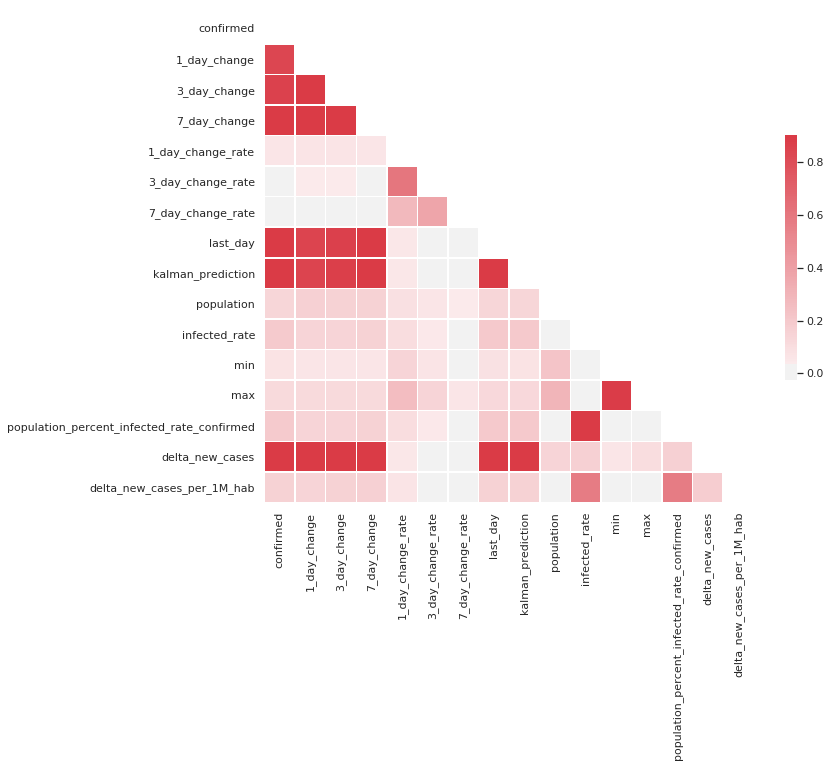

In [51]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [52]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed                                     1.000000
1_day_change                                  0.841556
3_day_change                                  0.862076
7_day_change                                  0.893170
1_day_change_rate                             0.057941
3_day_change_rate                             0.023830
7_day_change_rate                             0.001635
last_day                                      0.964172
kalman_prediction                             0.965211
population                                    0.134645
infected_rate                                 0.196700
min                                           0.076423
max                                           0.118316
population_percent_infected_rate_confirmed    0.196700
delta_new_cases                               0.905879
delta_new_cases_per_1M_hab                    0.158798
Name: confirmed, dtype: float64


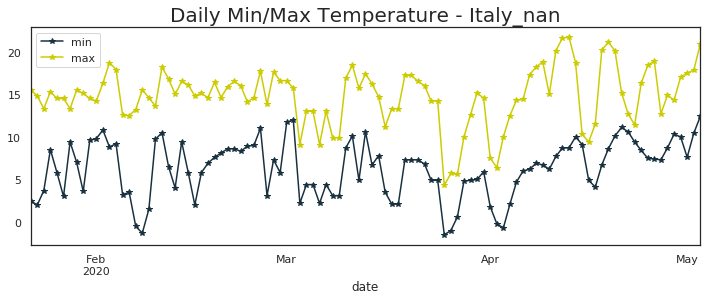

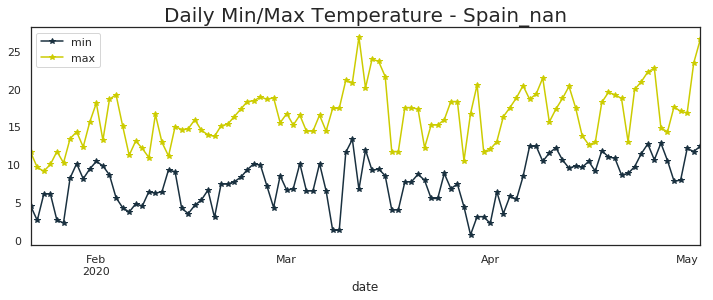

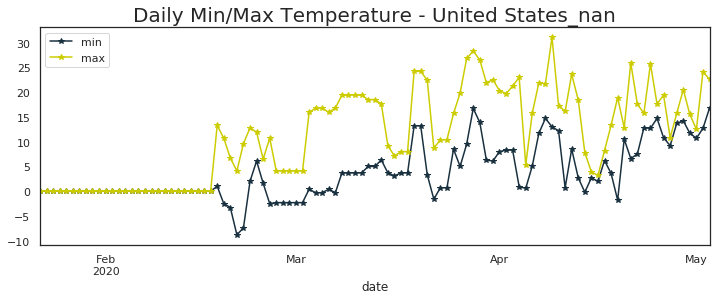

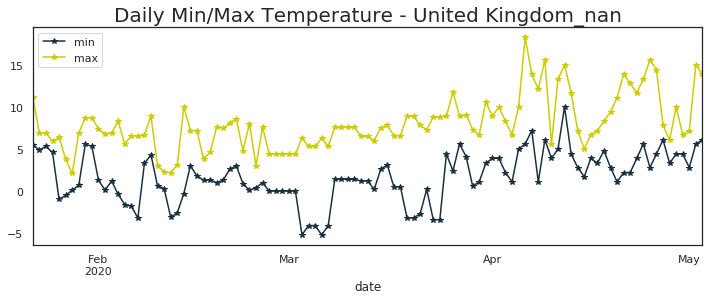

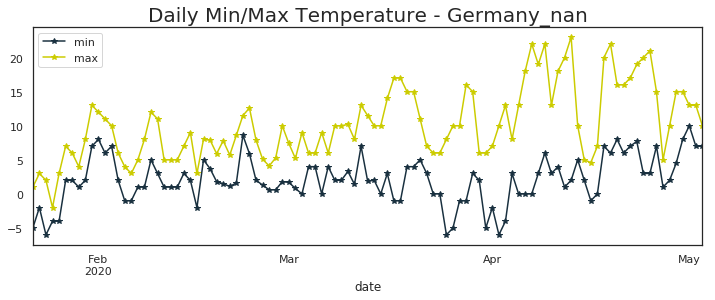

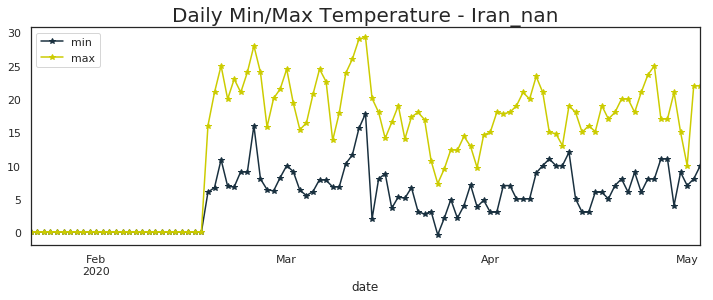

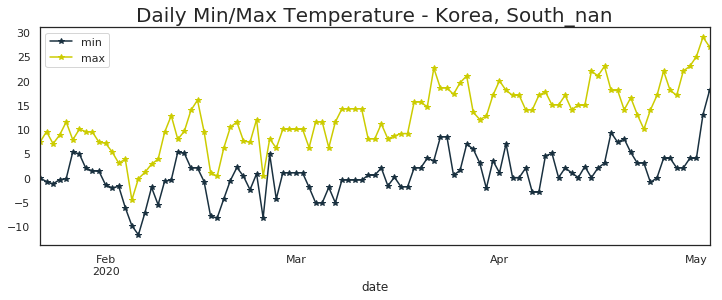

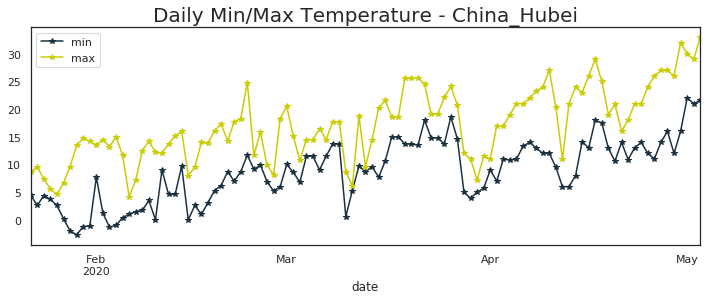

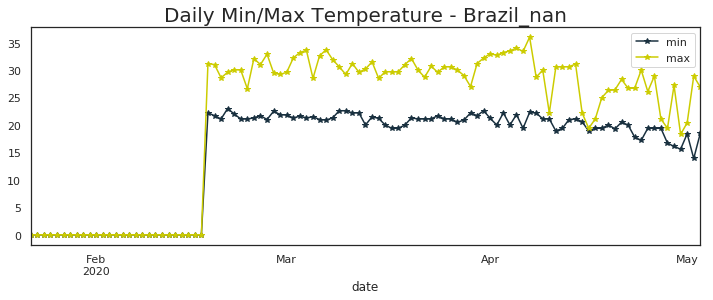

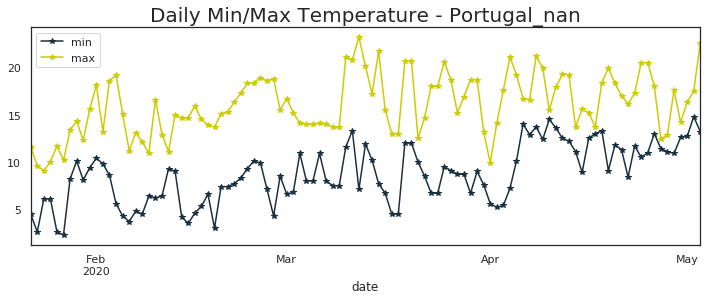

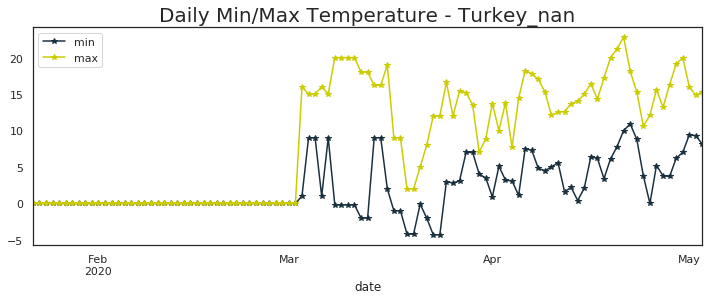

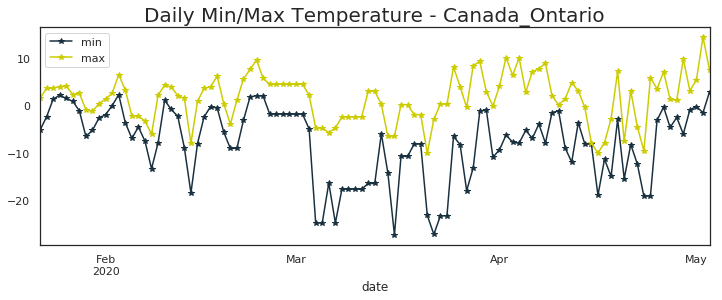

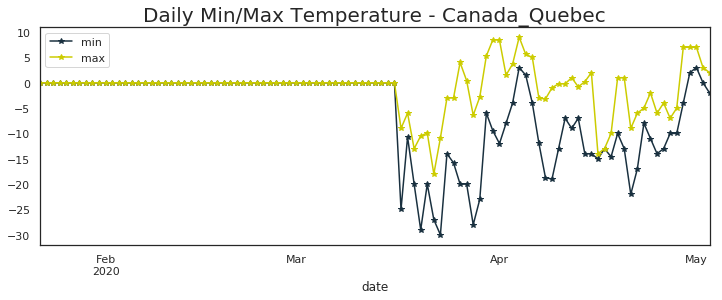

In [53]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [54]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.8  31.1
Spain_nan                   13.3  26.8
Italy_nan                   12.4  21.7
United Kingdom_nan          10.0  18.3
France_nan                  13.0  23.0
Germany_nan                 10.0  23.0
Turkey_nan                  10.9  22.8
Russia_nan                  13.0  30.0
Brazil_nan                  23.0  36.0
Iran_nan                    17.8  29.3
China_Hubei                 22.0  33.0
Belgium_nan                 17.8  26.1
Peru_nan                     0.0   0.0
Netherlands_nan             13.9  26.1
India_nan                   29.0  42.0
Switzerland_nan             11.2  19.7
Canada_Quebec                3.0   9.0
Ecuador_nan                  0.0   0.0
Saudi Arabia_nan             0.0   0.0
Portugal_nan                14.8  23.2
Mexico_nan                   0.0   0.0
Sweden_nan                   6.1  18.9
Ireland_nan                 

### Kalman X Days Ahead Prediction

In [55]:
%%R

#install.packages('reshape')

NULL


In [56]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [57]:
all_new=%R all_new

In [58]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

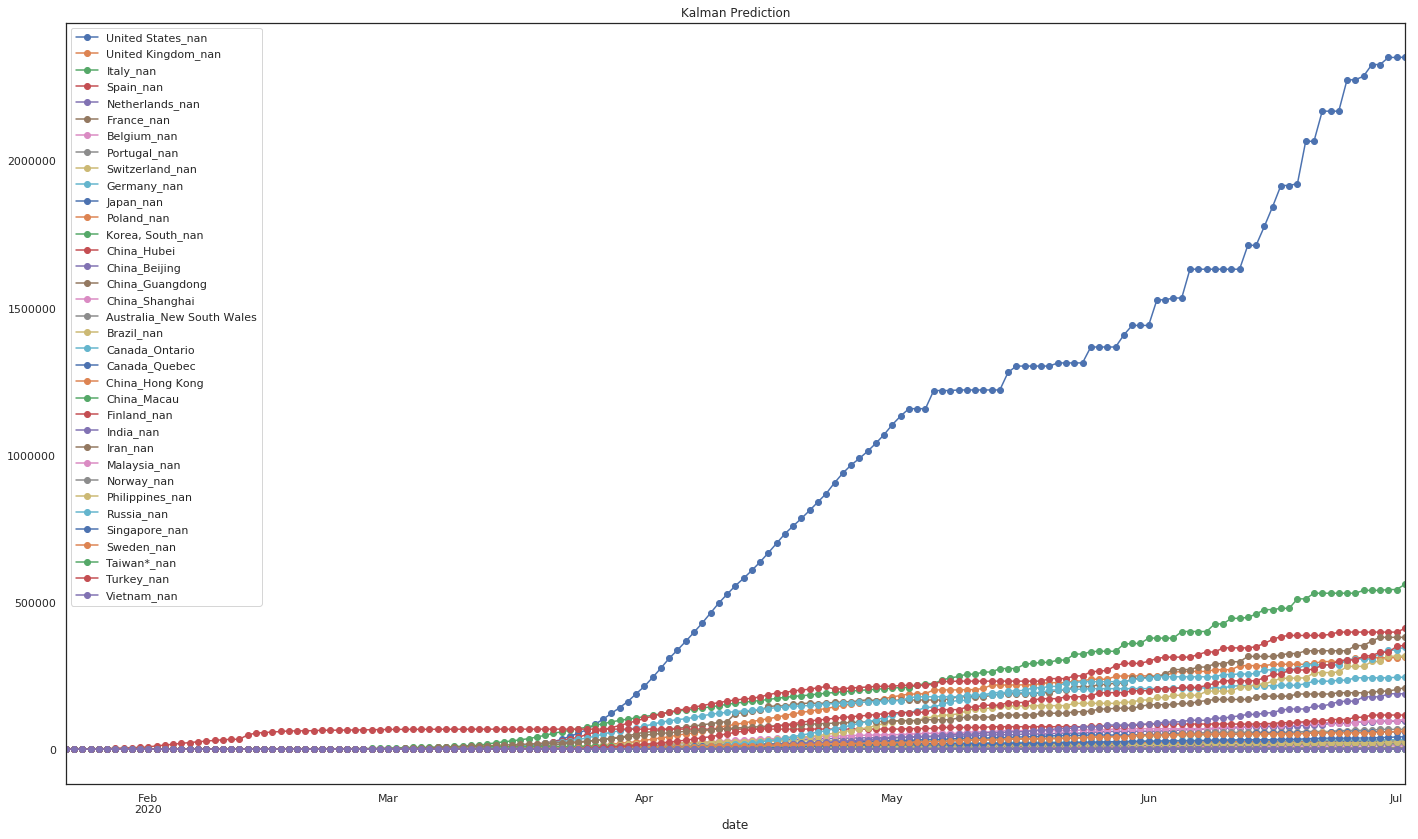

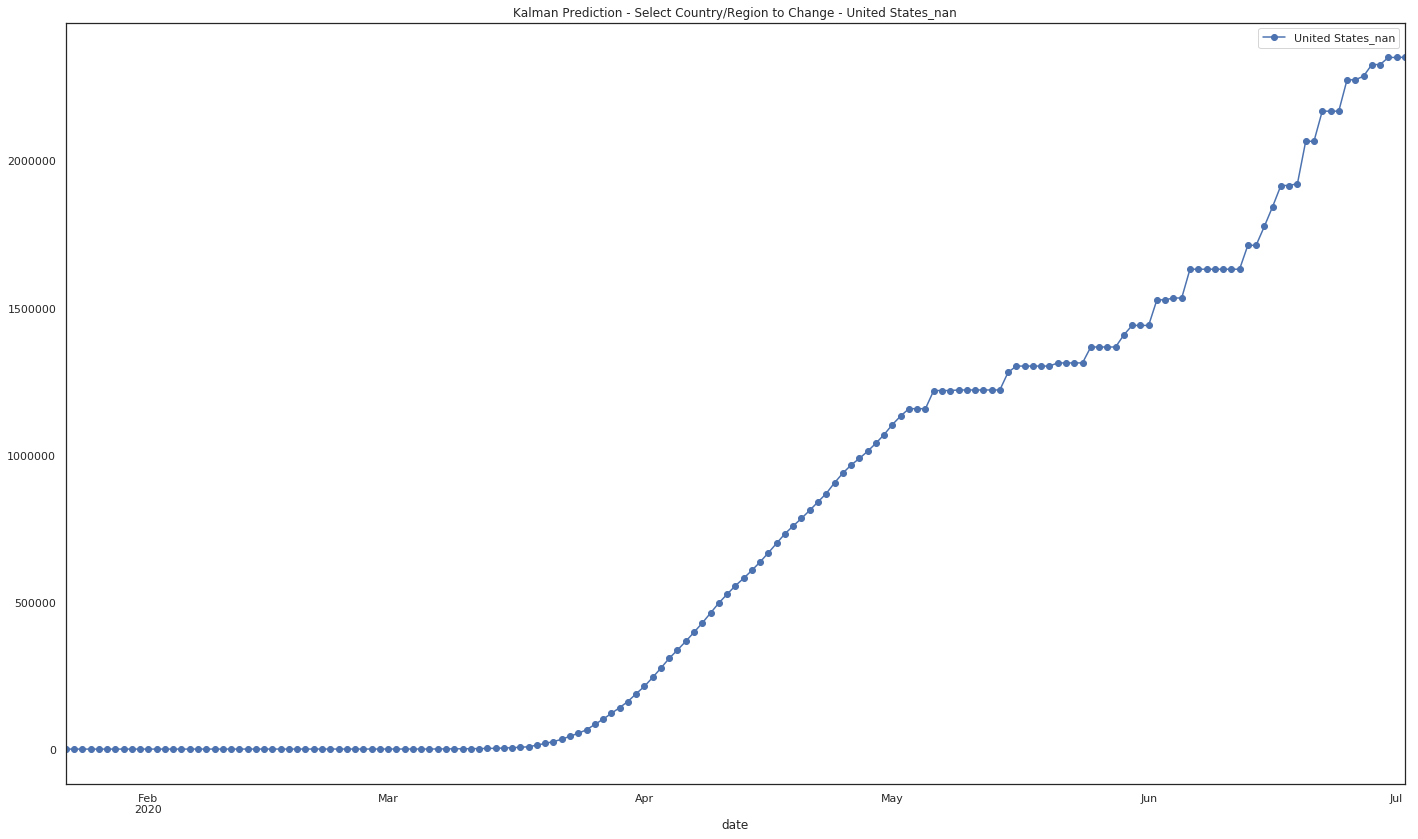

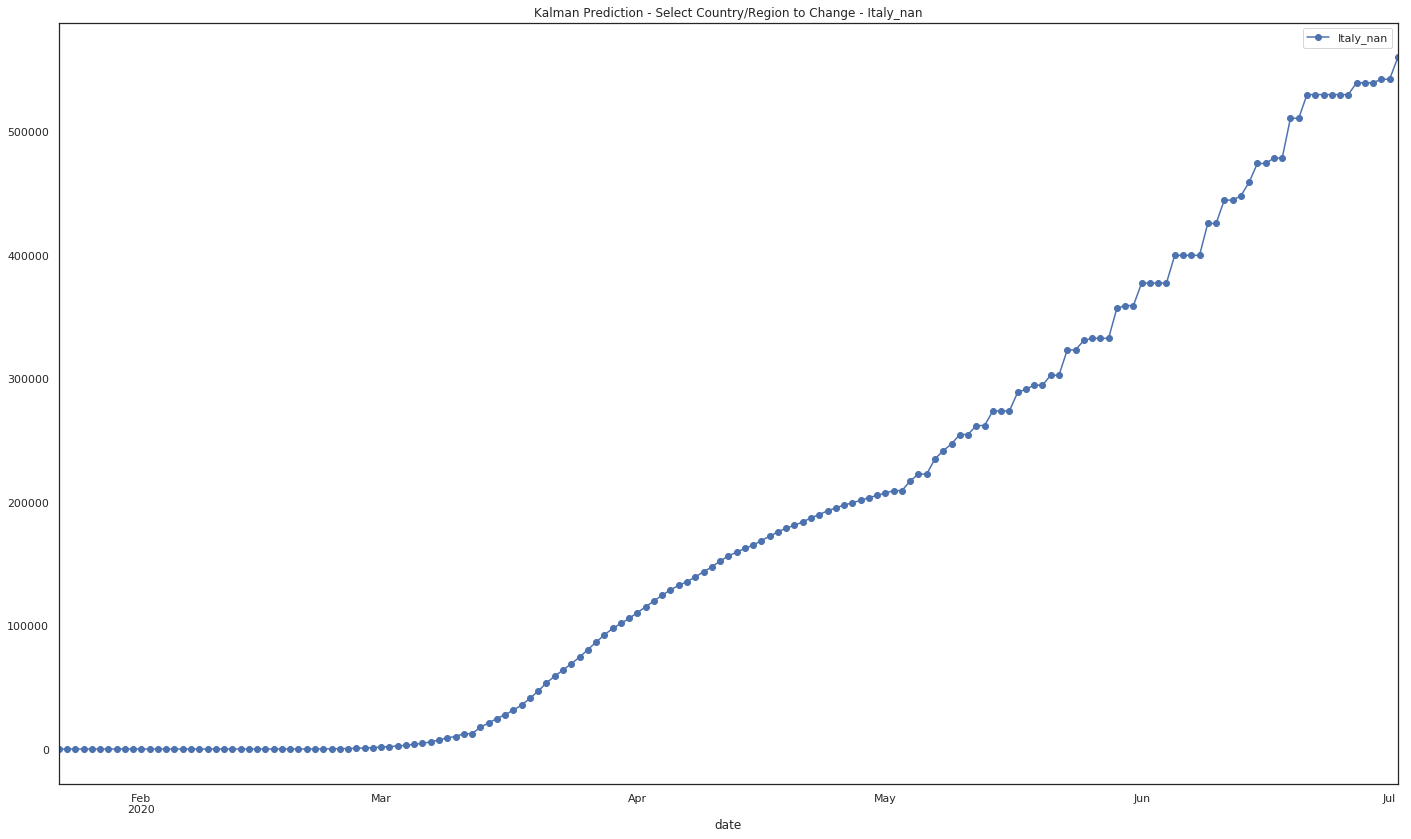

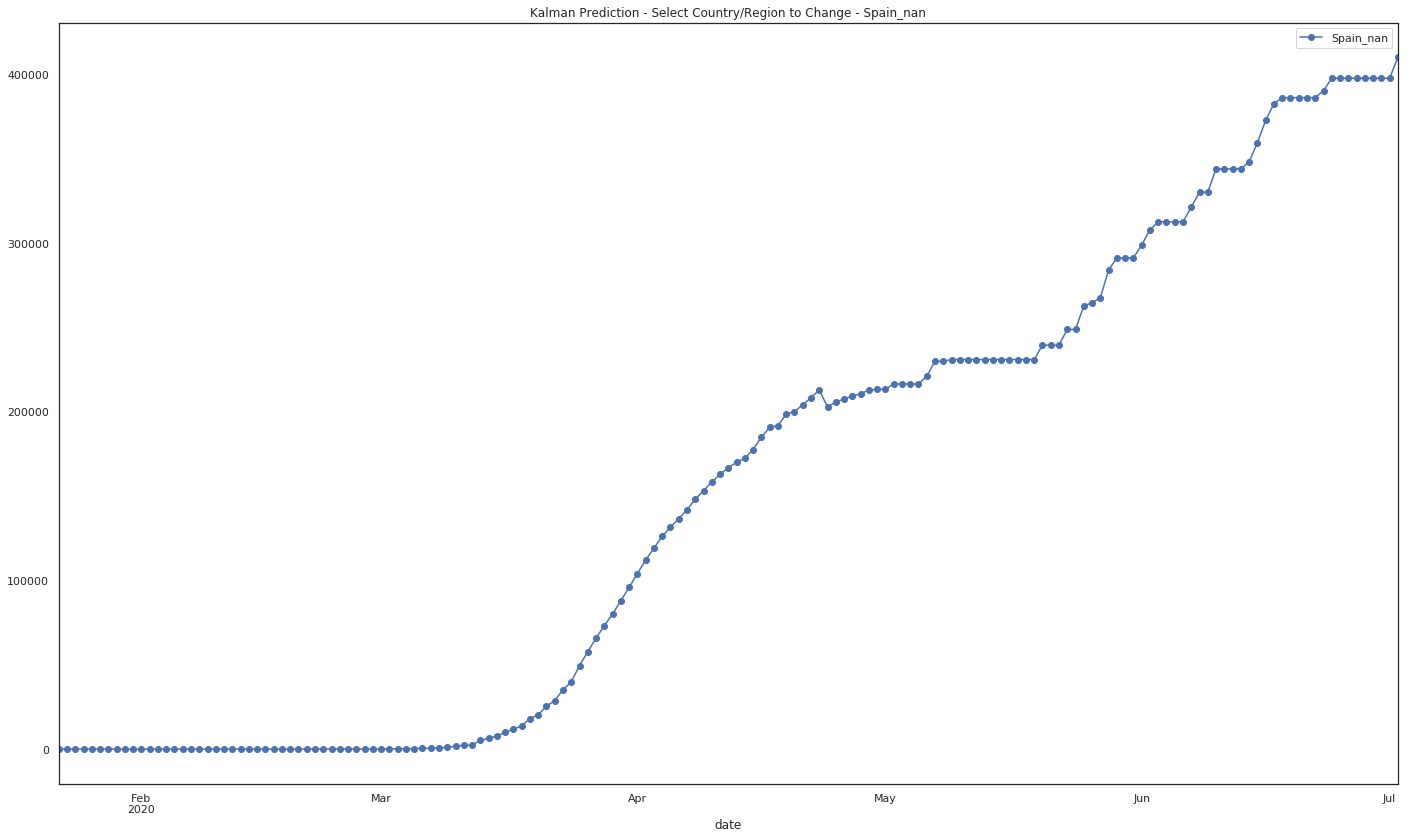

In [59]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


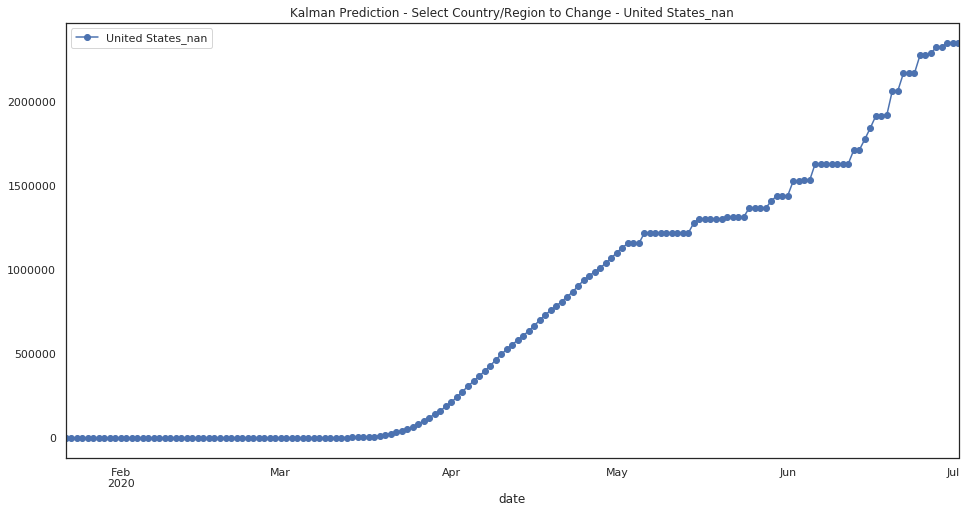

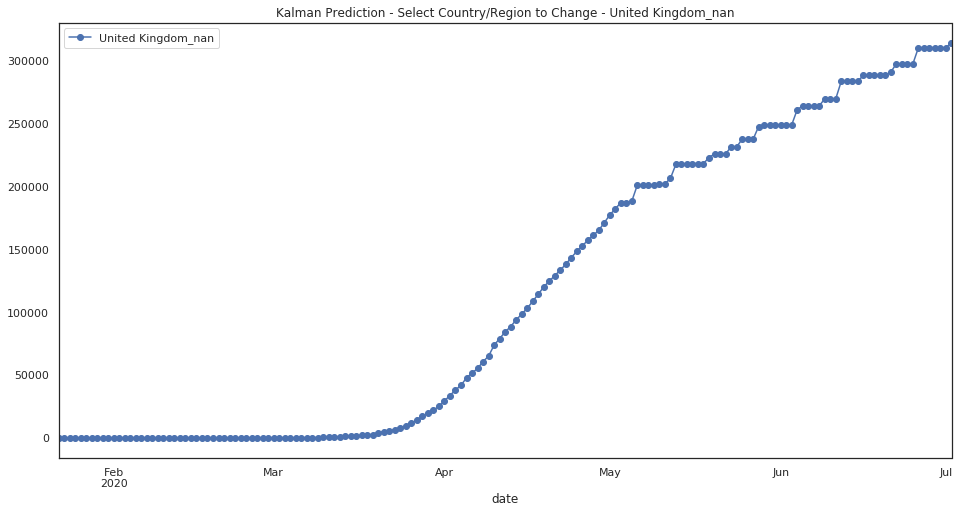

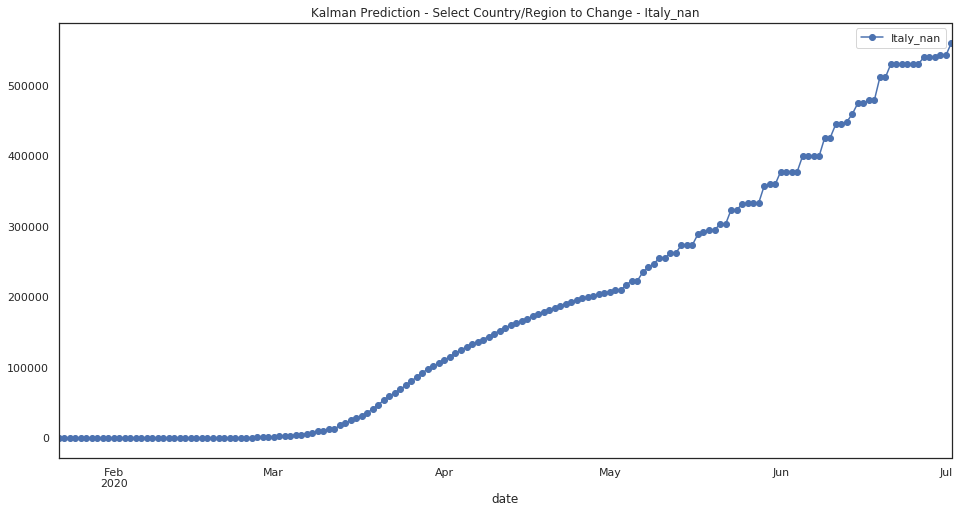

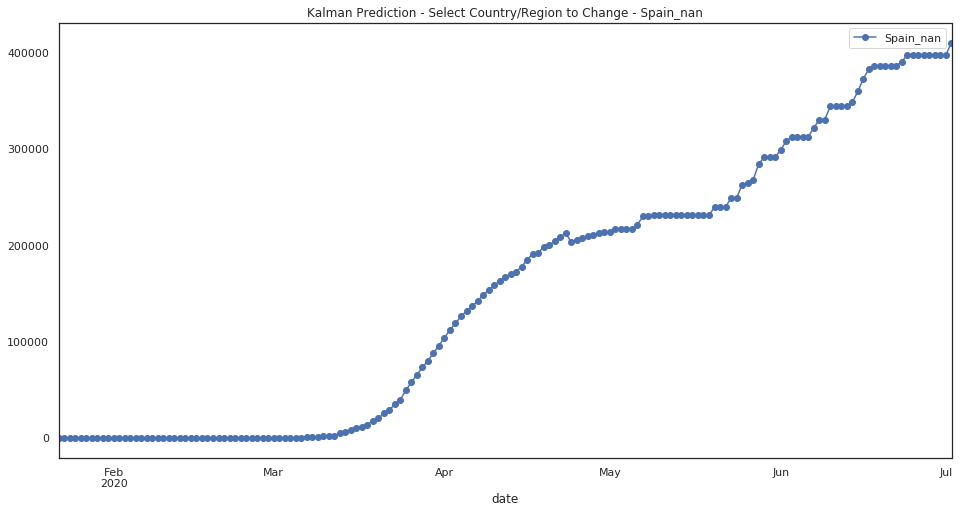

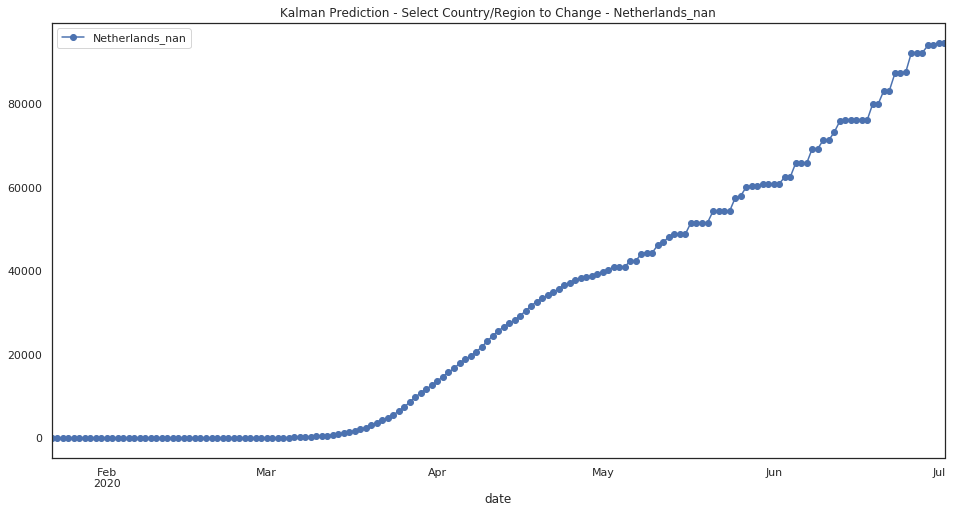

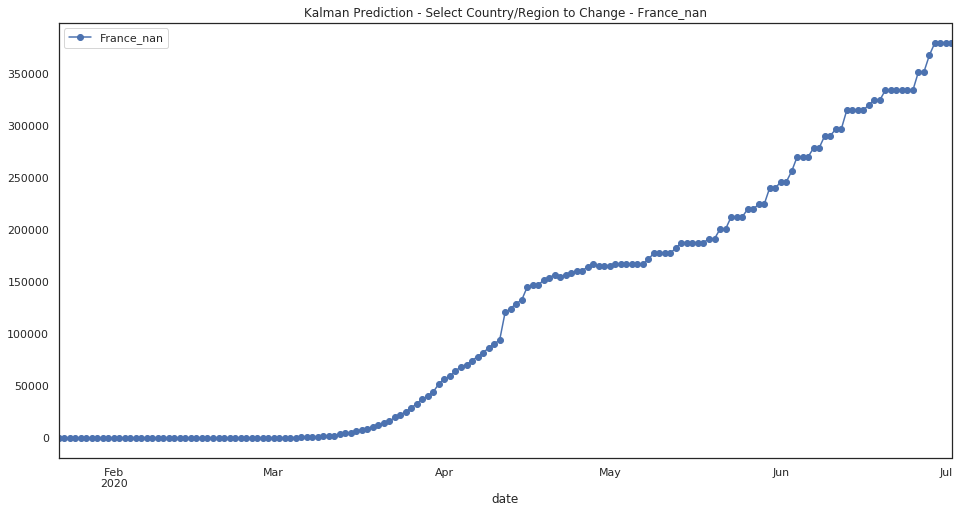

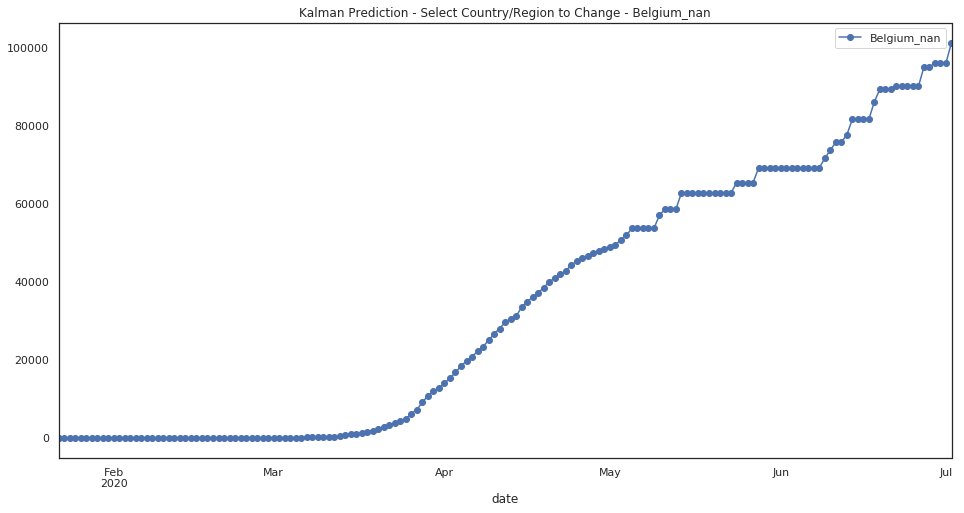

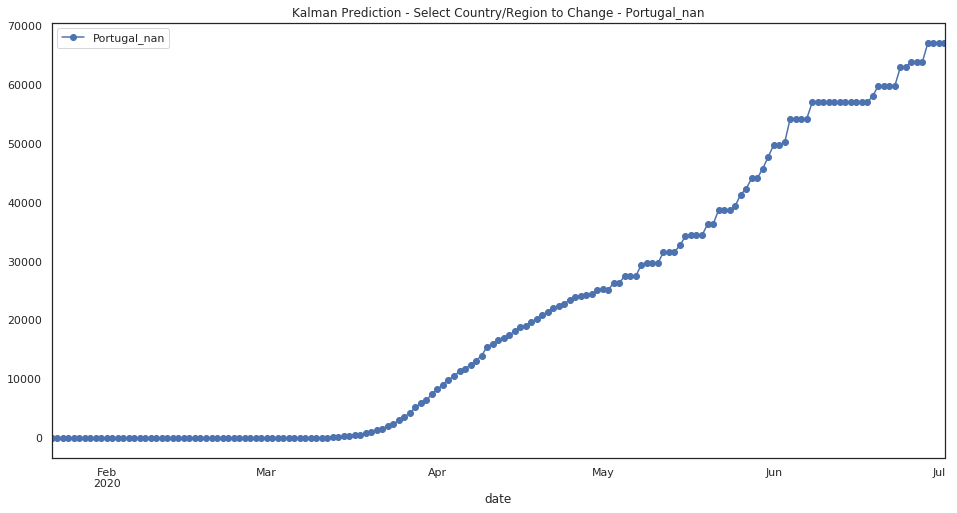

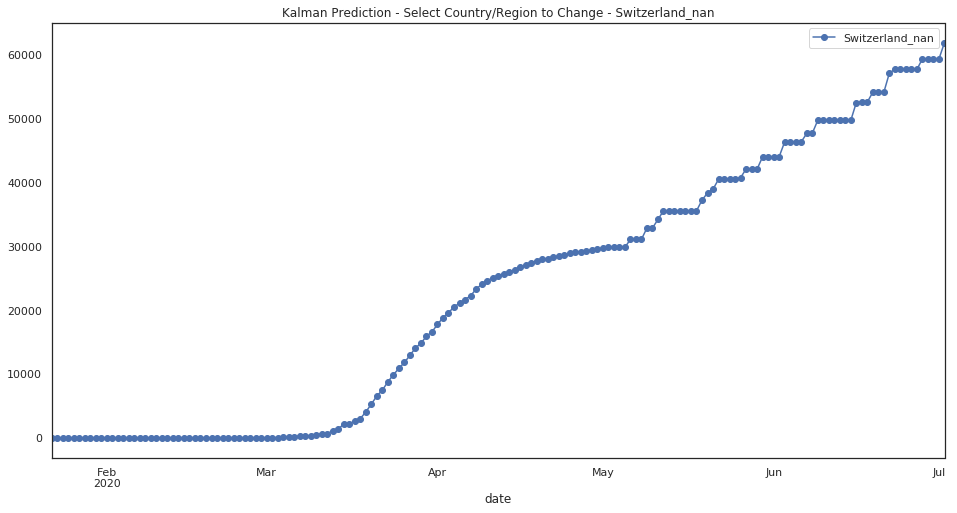

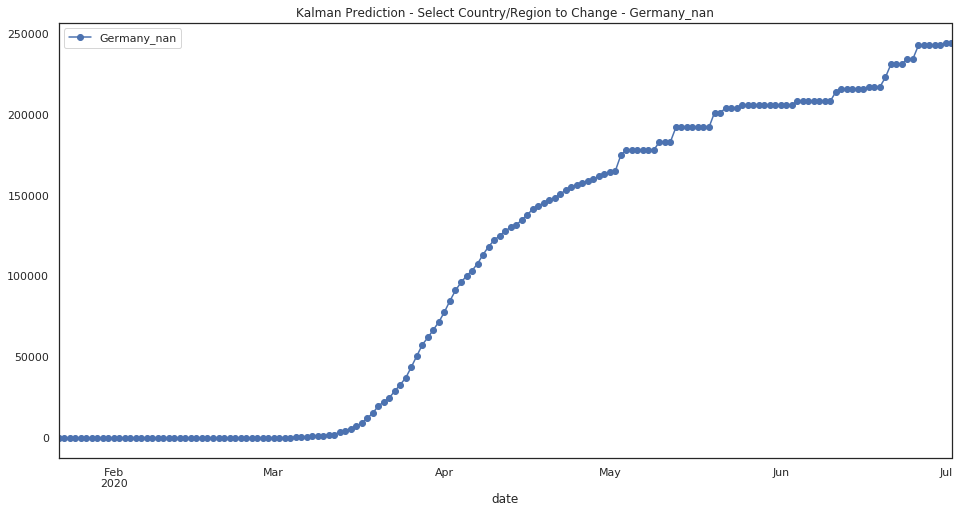

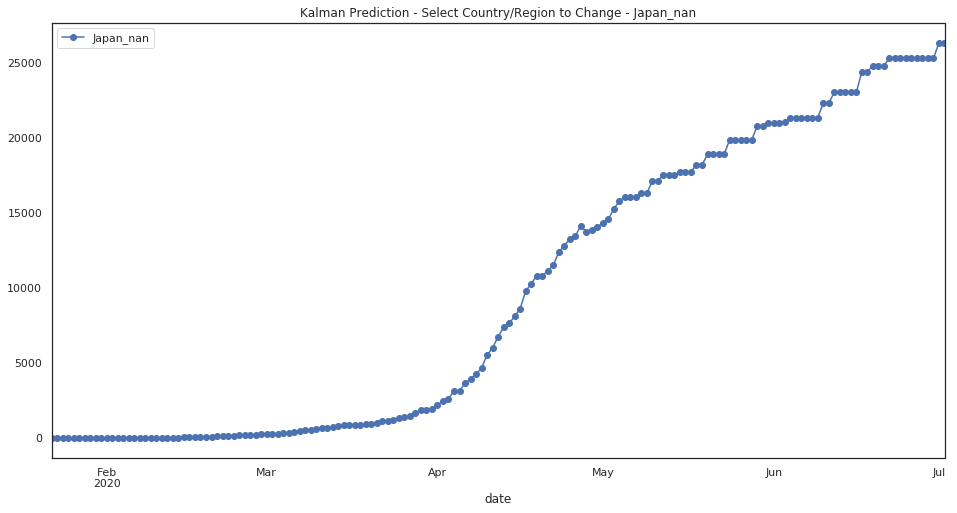

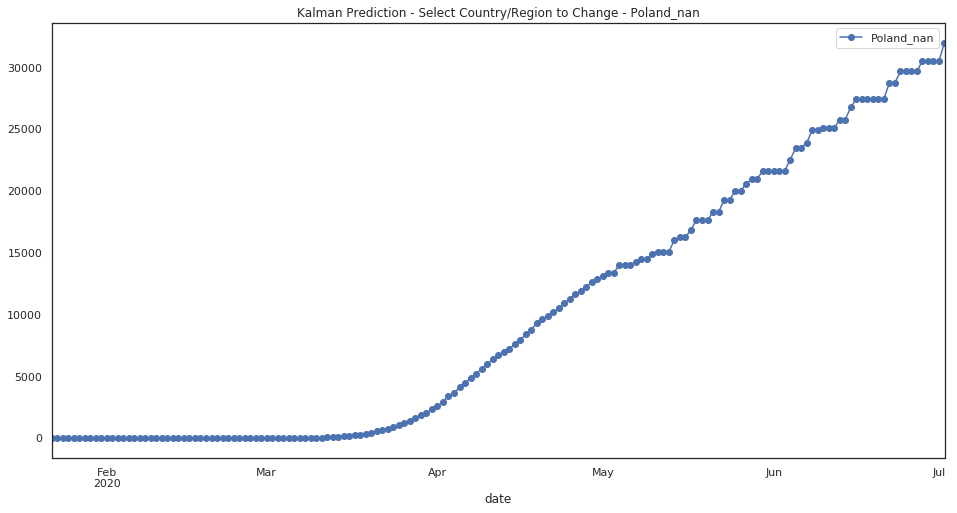

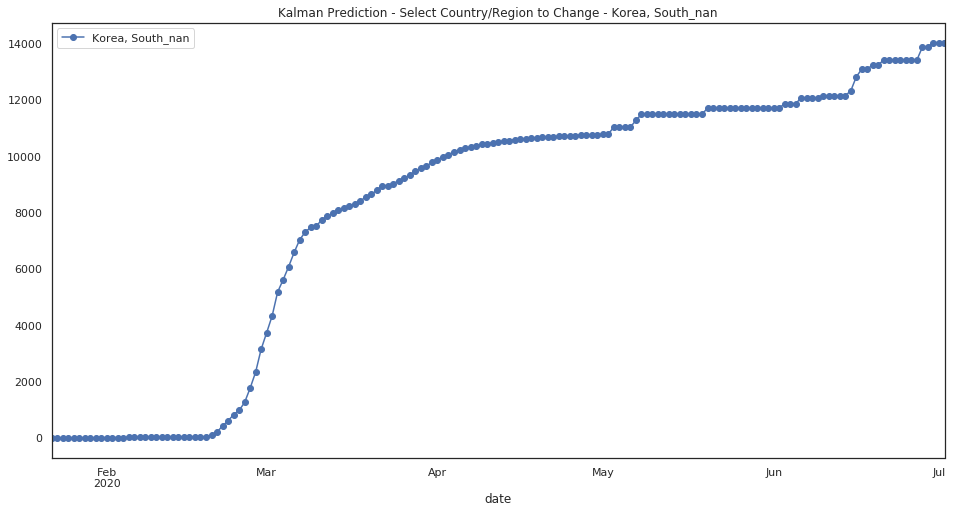

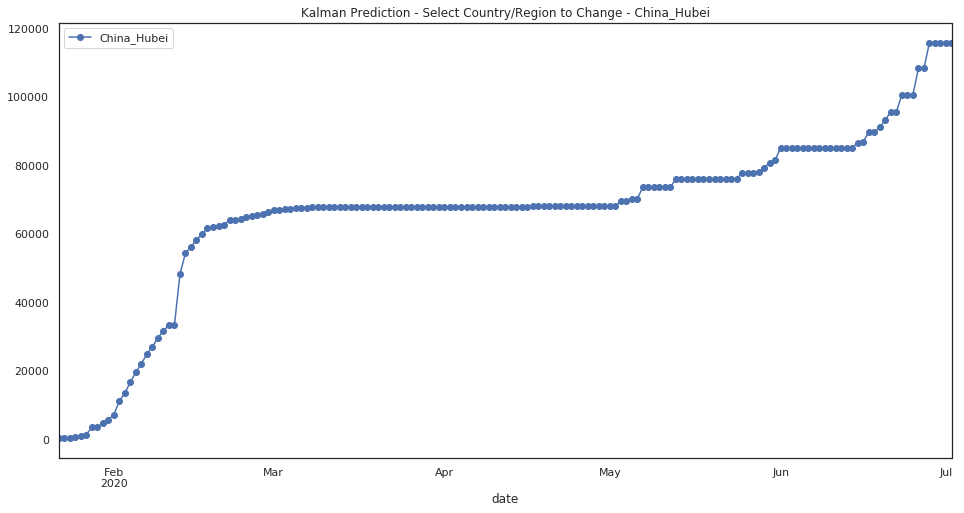

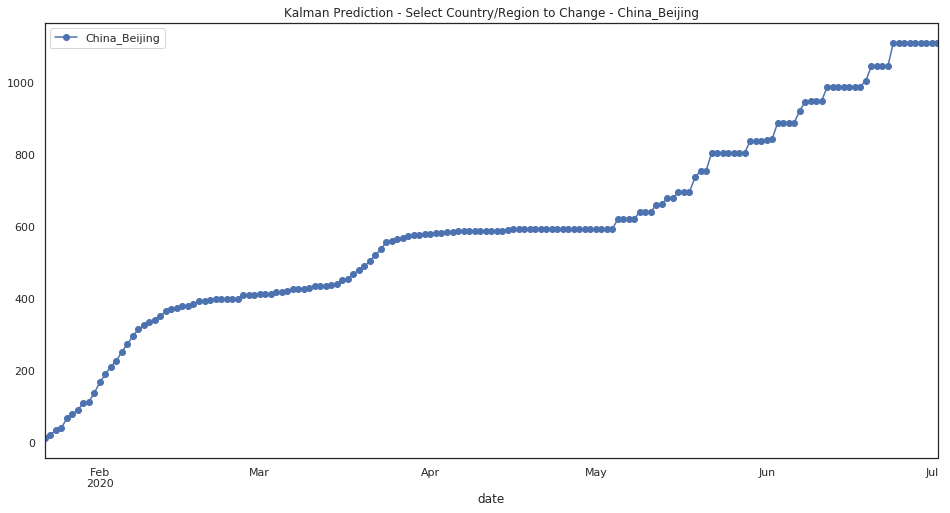

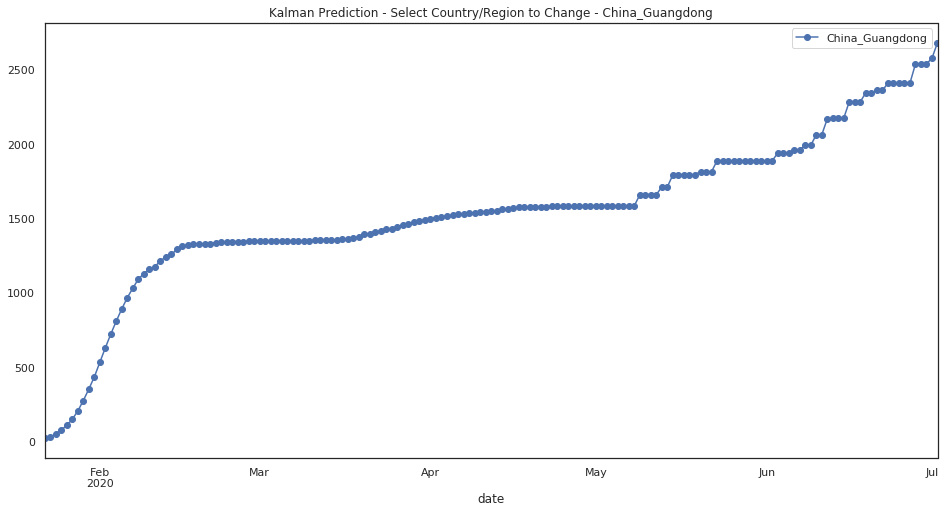

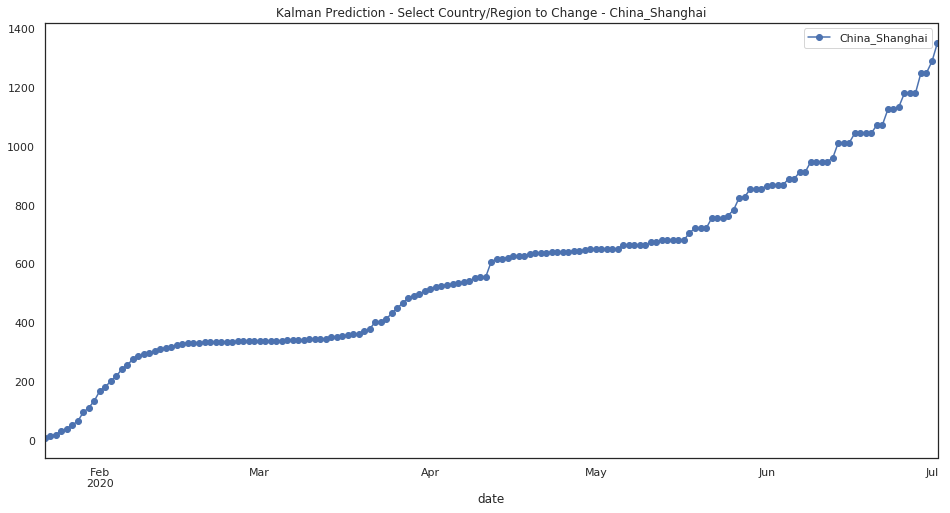

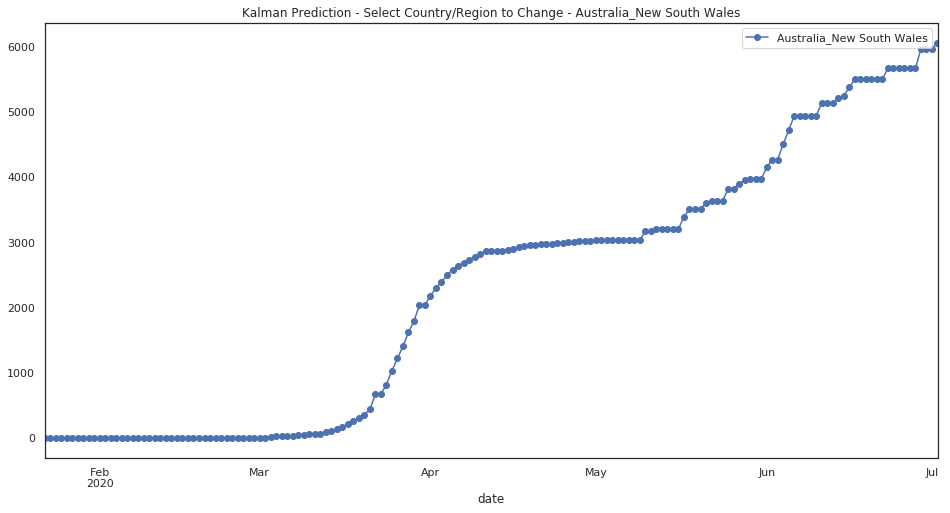

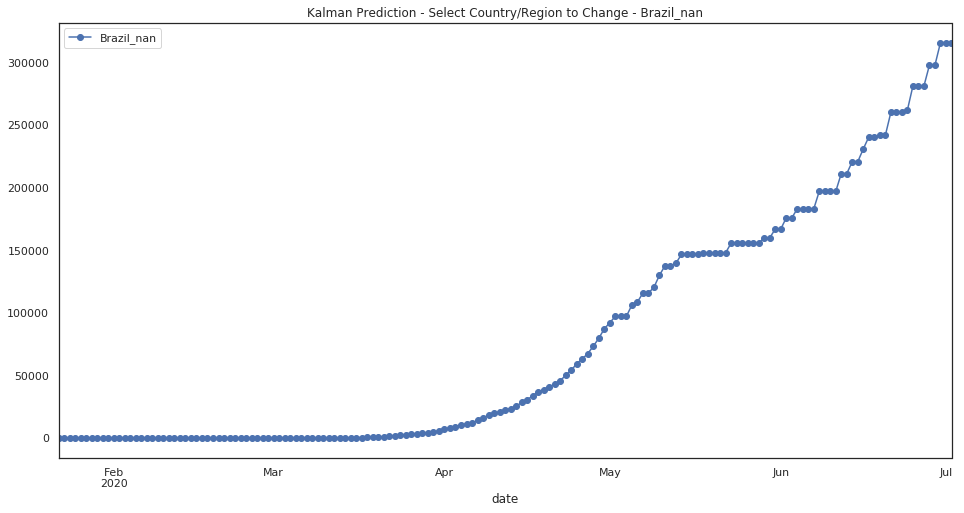

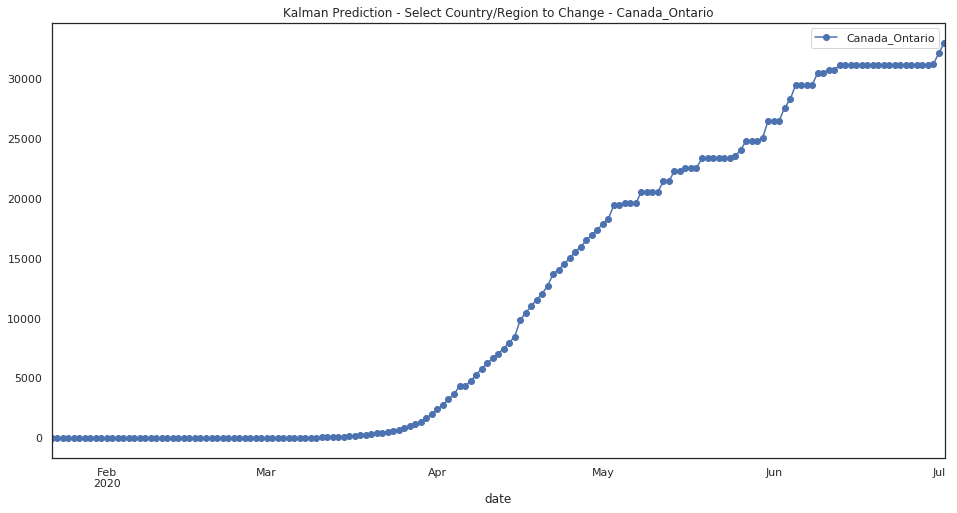

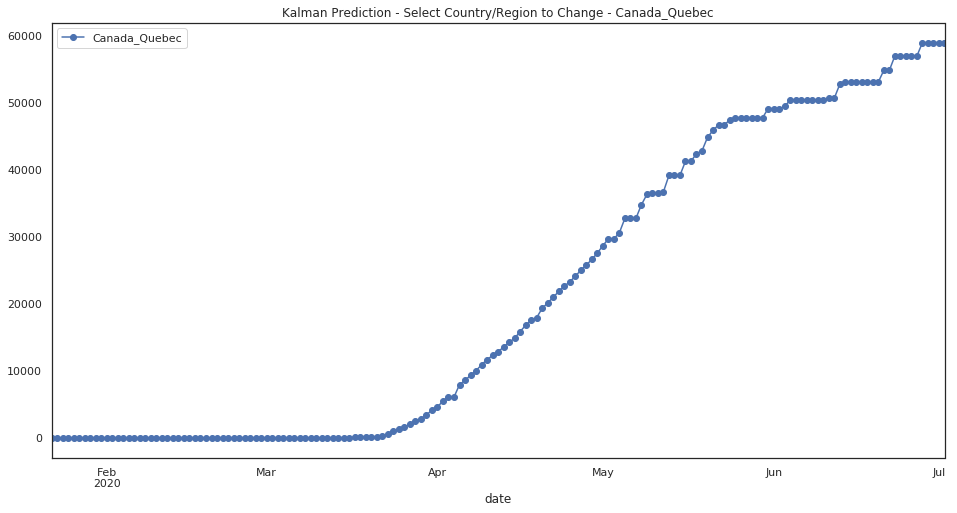

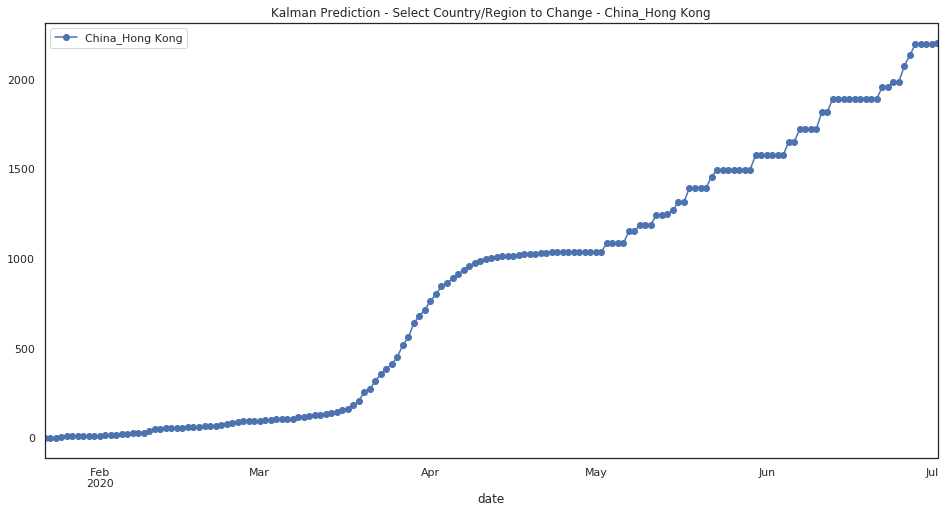

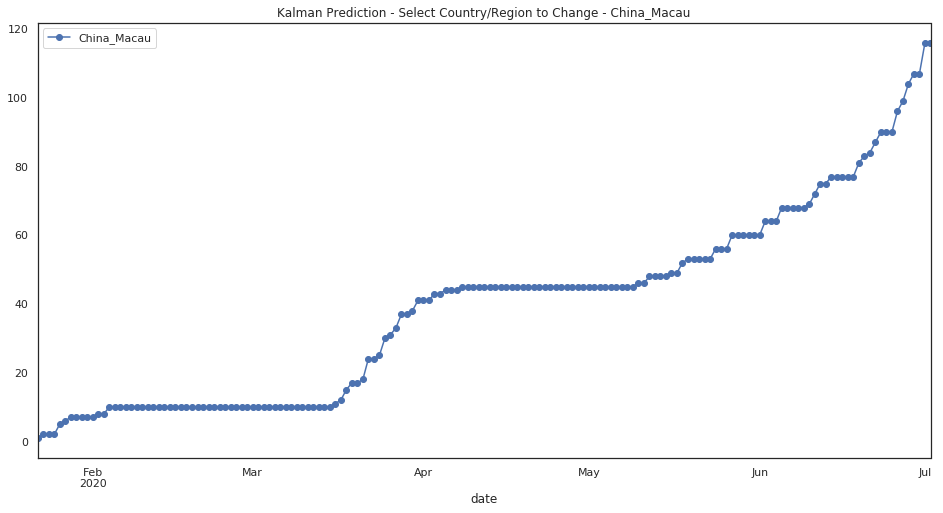

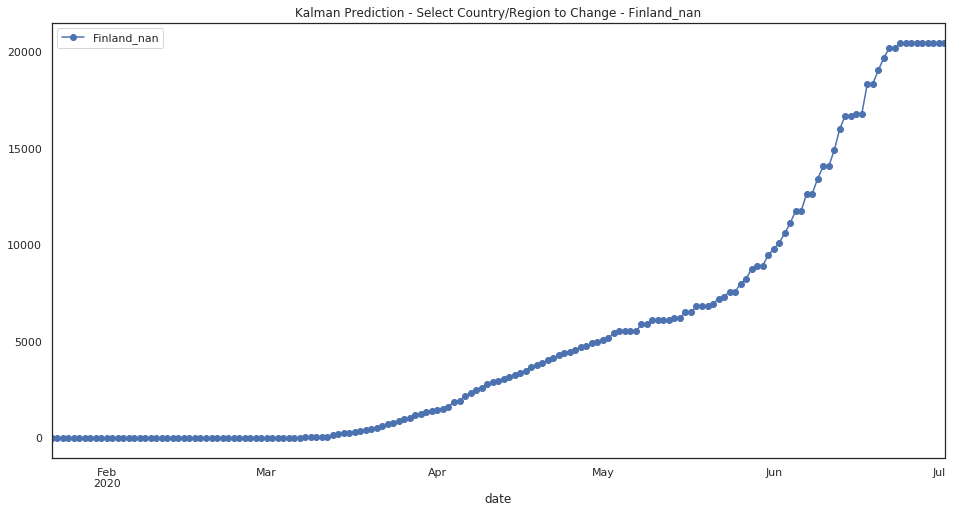

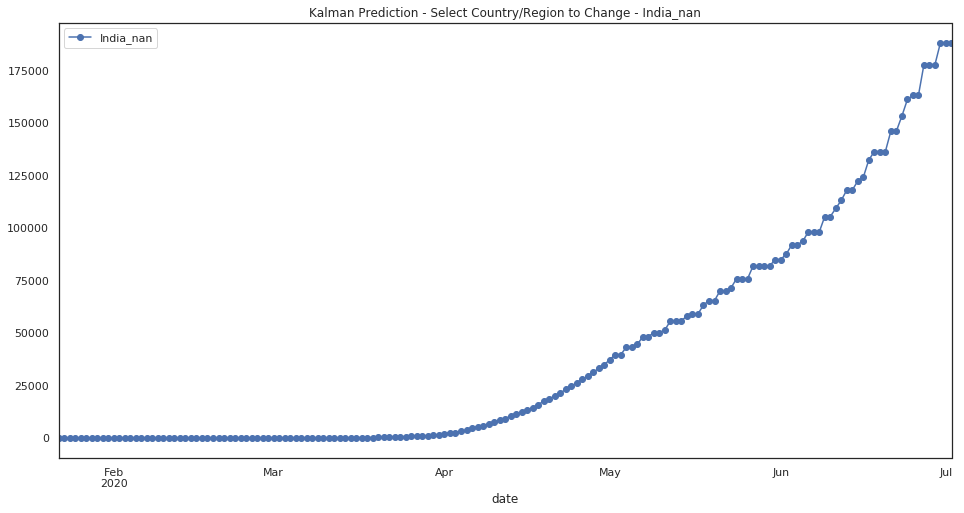

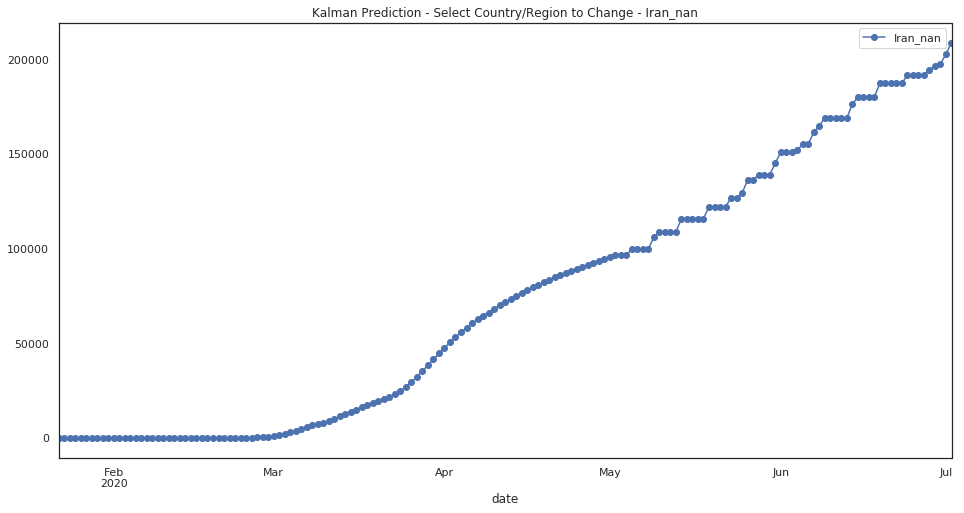

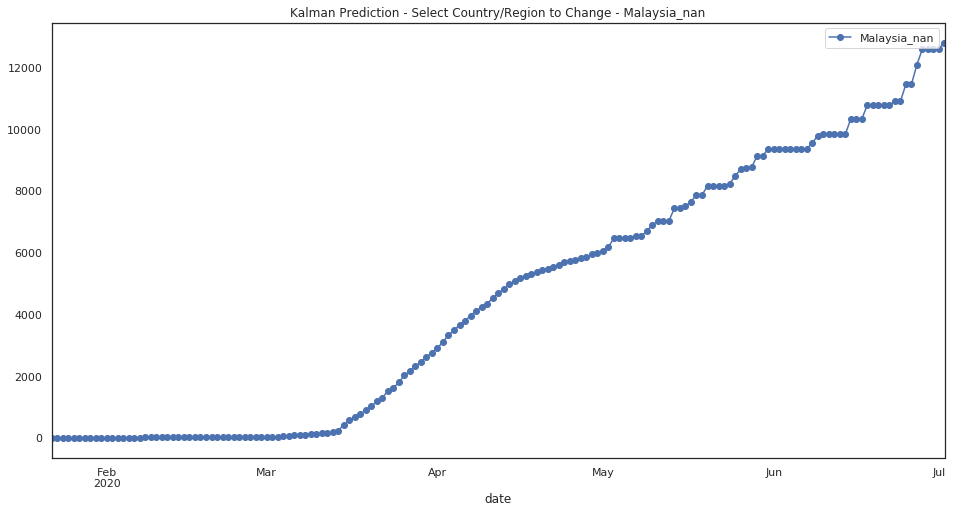

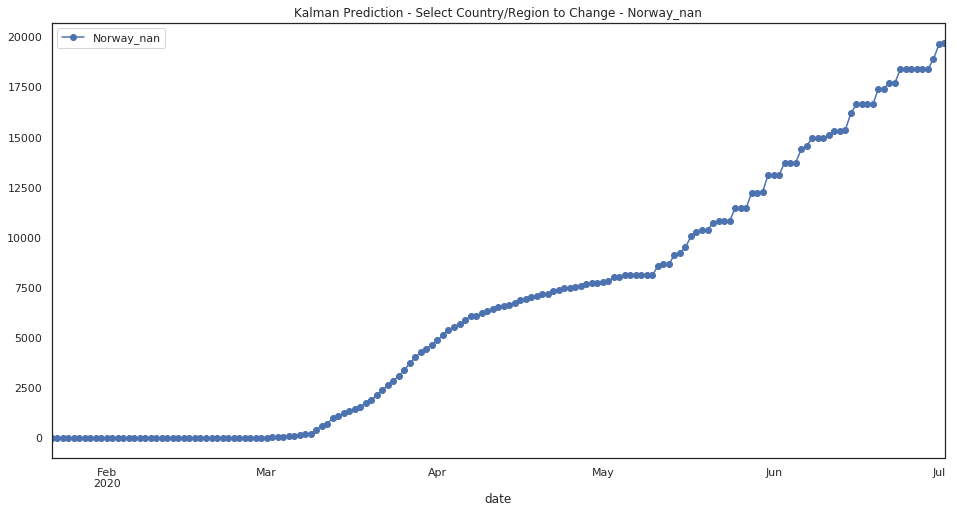

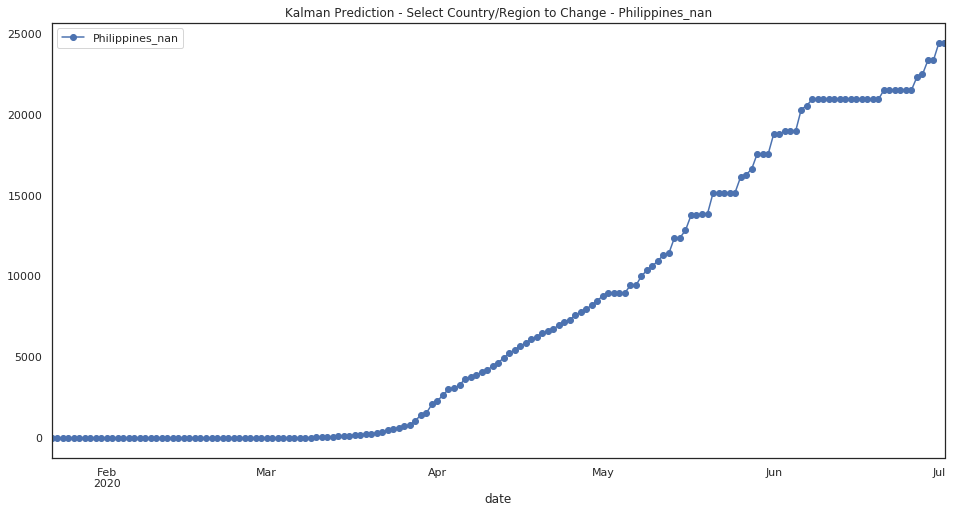

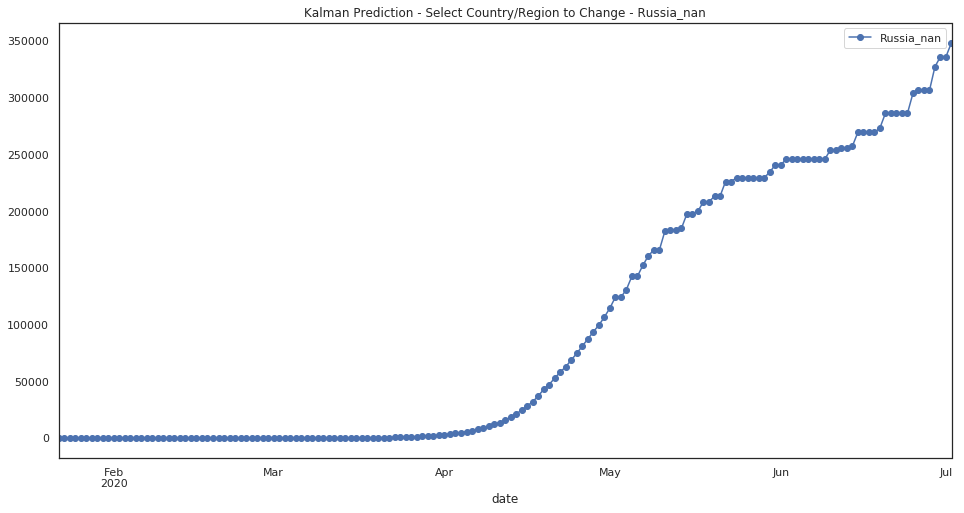

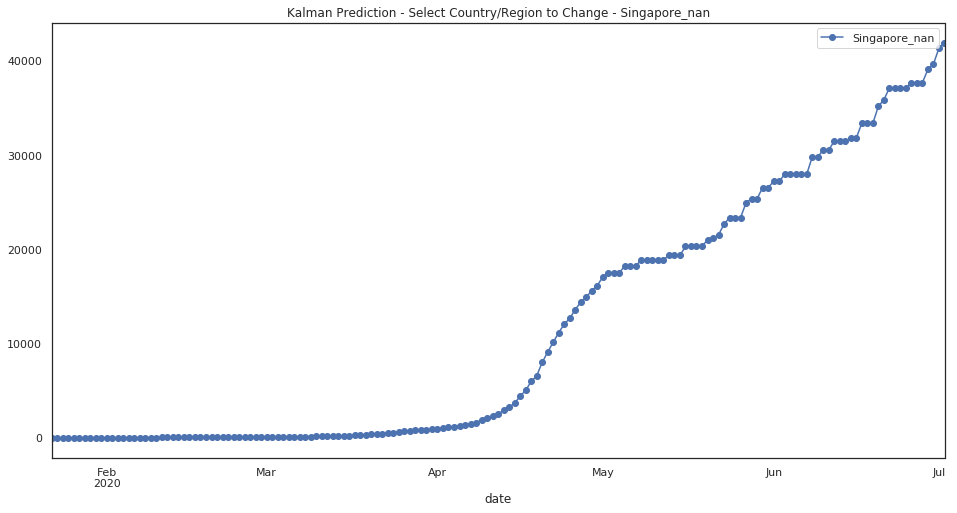

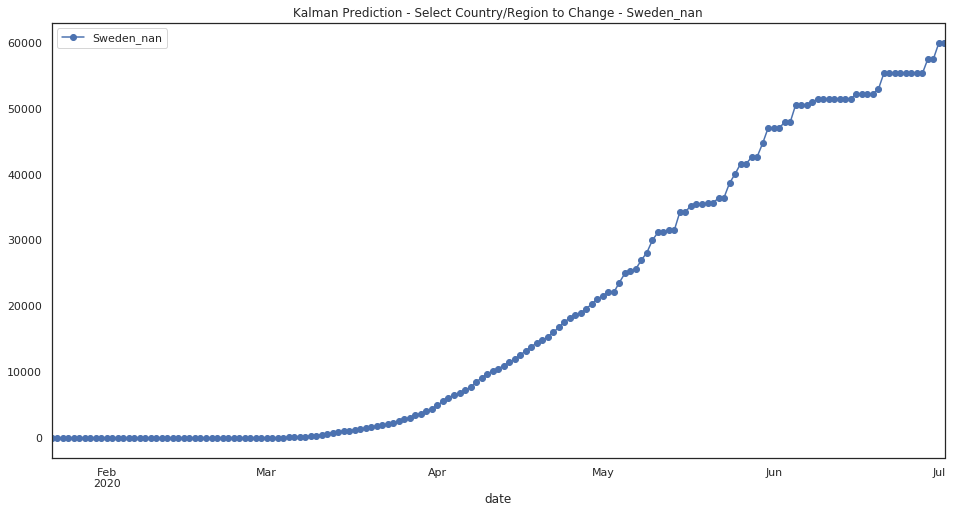

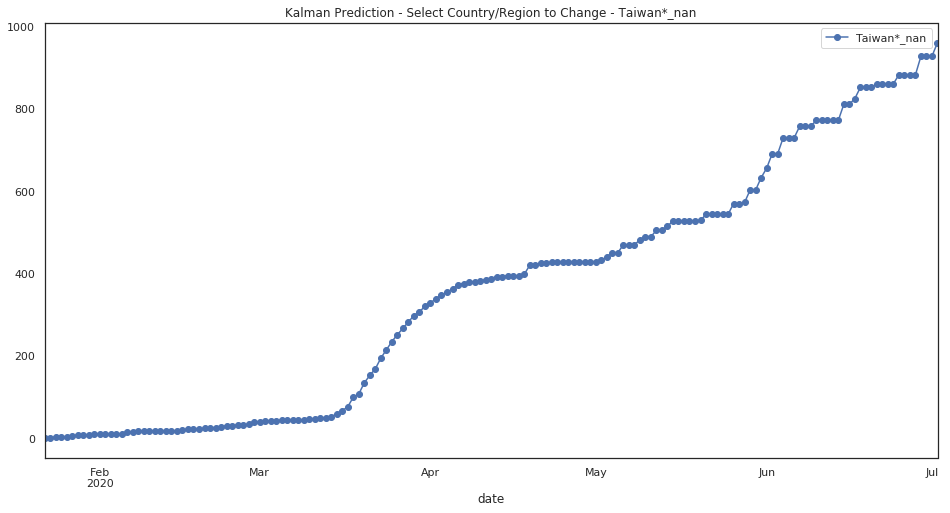

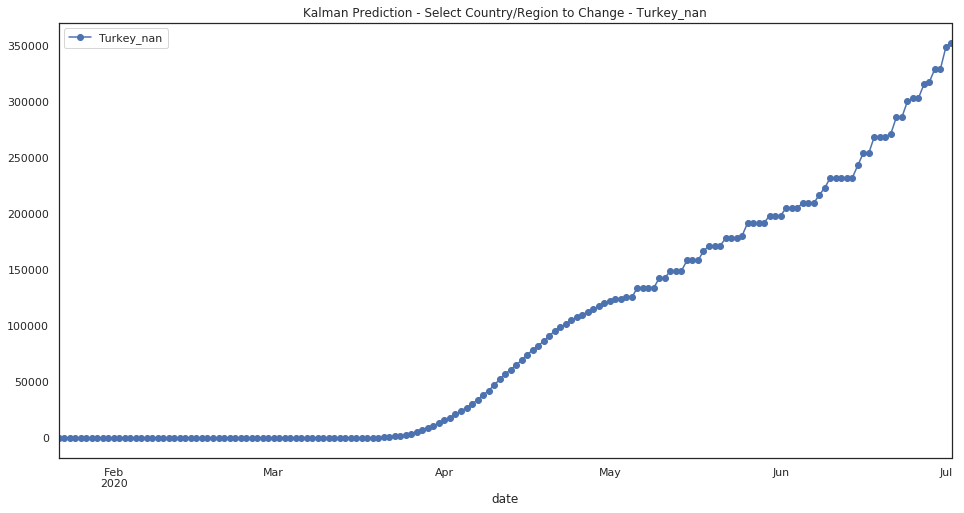

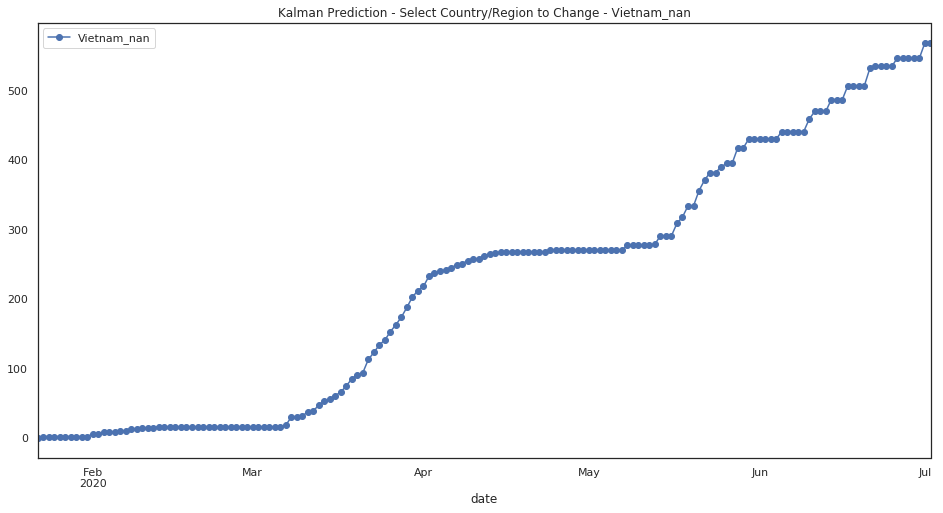

In [60]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [61]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-07-02 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       2352604.0
Italy_nan                                     NaN        560355.0
Spain_nan                                     NaN        410357.0
France_nan                                    NaN        380130.0
Turkey_nan                                    NaN        352870.0
Russia_nan                                    NaN        348680.0
Brazil_nan                                    NaN        315942.0
United Kingdom_nan                            NaN        314541.0
Germany_nan                                   NaN        244277.0
Iran_nan                                      NaN        208788.0
India_nan                                     NaN        188171.0
Peru_nan                                      NaN        153573.0
China_Hubei                                   NaN        115835.0
Belgium_nan                                   NaN        101285.0
Netherlands_nan                               NaN         94657.0
Portugal_nan                                  NaN         67095.0
Saudi Arabia_nan                              NaN         65033.0
Pakistan_nan                                  NaN         64294.0
Switzerland_nan                               NaN         61896.0
Ecuador_nan                                   NaN         61851.0
Sweden_nan                                    NaN         59957.0
Canada_Quebec                                 NaN         58943.0
Chile_nan                                     NaN         50938.0
Ukraine_nan                                   NaN         45690.0
Qatar_nan                                     NaN         45059.0
Singapore_nan                                 NaN         41965.0
Ireland_nan                                   NaN         35148.0
Canada_Ontario                                NaN         33030.0
Poland_nan                                    NaN         32003.0
Romania_nan                                   NaN         31515.0
...                                           ...             ...
Botswana_nan                                  NaN            31.0
Dominica_nan                                  NaN            31.0
Canada_Grand Princess                         NaN            29.0
Saint Kitts and Nevis_nan                     NaN            29.0
United Kingdom_Turks and Caicos Islands       NaN            29.0
Saint Lucia_nan                               NaN            28.0
France_New Caledonia                          NaN            27.0
Yemen_nan                                     NaN            25.0
Netherlands_Curacao                           NaN            24.0
Holy See_nan                                  NaN            23.0
Seychelles_nan                                NaN            20.0
Canada_Yukon                                  NaN            13.0
Denmark_Greenland                             NaN            12.0
United Kingdom_Montserrat                     NaN            12.0
Suriname_nan                                  NaN            10.0
MS Zaandam_nan                                NaN             9.0
Mauritania_nan                                NaN             8.0
Papua New Guinea_nan                          NaN             8.0
Bhutan_nan                                    NaN             7.0
France_Saint Barthelemy                       NaN             6.0
Western Sahara_nan                            NaN             6.0
United Kingdom_British Virgin Islands         NaN             6.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             6.0
Canada_Northwest Territories                  NaN             5.0
Comoros_nan                                   NaN             4.0
United Kingdom_Anguilla                       NaN             3.0
France_Saint Pierre and Miquelon              NaN             1.0
Canada_Diamond Princess                       NaN             1.0
China_Tibet                                   NaN             1.0
Canada_Recovered      

In [62]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [63]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [64]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [65]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [66]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [67]:
pred[:-1]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-01-22           -137.0      -1693.0       -118.0     -63090.0   
2020-01-23              0.0          0.0          0.0          0.0   
2020-01-24              0.0          0.0          0.0          0.0   
2020-01-25              0.0          0.0          0.0          0.0   
2020-01-26              0.0          0.0          0.0          0.0   
2020-01-27              0.0          0.0          0.0          0.0   
2020-01-28              0.0          0.0          0.0          0.0   
2020-01-29              0.0          0.0          0.0          0.0   
2020-01-30              0.0          0.0          0.0          0.0   
2020-01-31              0.0          0.0          0.0          0.0   
2020-02-01              0.0          0.0          0.0          0.0   
2020-02-02              0.0          0.0          0.0          0.0   
2020-02-03              0.0          0.0          0.0          0.0   
2020-02-04              0.0          0.0          0.0          0.0   
2020-02-05              0.0          0.0          0.0          0.0   
2020-02-06              0.0          0.0          0.0          0.0   
2020-02-07              0.0          0.0          0.0          0.0   
2020-02-08              0.0          0.0          0.0          0.0   
2020-02-09              0.0          0.0          0.0          0.0   
2020-02-10              0.0          0.0          0.0          0.0   
2020-02-11              0.0          0.0          0.0          0.0   
2020-02-12              0.0          0.0          0.0          0.0   
2020-02-13              0.0          0.0          0.0          0.0   
2020-02-14              0.0          0.0          0.0          0.0   
2020-02-15              0.0          0.0          0.0          0.0   
2020-02-16              0.0          0.0          0.0          0.0   
2020-02-17              0.0          0.0          0.0          0.0   
2020-02-18              0.0          0.0          0.0          0.0   
2020-02-19              0.0          0.0          0.0          0.0   
2020-02-20              0.0          0.0          0.0          0.0   
...                     ...          ...          ...          ...   
2020-06-03           3791.0       1057.0       7229.0        958.0   
2020-06-04           3791.0       1106.0       7589.0        958.0   
2020-06-05           3791.0       1133.0       7589.0       1015.0   
2020-06-06           3987.0       1133.0       8020.0       1015.0   
2020-06-07           3987.0       1133.0       8221.0       1015.0   
2020-06-08           3987.0       1170.0       8221.0       1031.0   
2020-06-09           3987.0       1170.0       8221.0       1083.0   
2020-06-10           4260.0       1182.0       8713.0       1083.0   
2020-06-11           4260.0       1182.0       8713.0       1094.0   
2020-06-12           4260.0       1182.0       9097.0       1094.0   
2020-06-13           4260.0       1195.0       9161.0       1118.0   
2020-06-14           4378.0       1210.0       9161.0       1118.0   
2020-06-15           4406.0       1210.0       9706.0       1156.0   
2020-06-16           4547.0       1210.0       9706.0       1156.0   
2020-06-17           4547.0       1210.0      10335.0       1156.0   
2020-06-18           4685.0       1244.0      10815.0       1176.0   
2020-06-19           4685.0       1248.0      10911.0       1219.0   
2020-06-20           4957.0       1248.0      10911.0       1219.0   
2020-06-21           4957.0       1248.0      10911.0       1259.0   
2020-06-22           4957.0       1248.0      11843.0       1259.0   
2020-06-23           4957.0       1315.0      12101.0       1309.0   
2020-06-24           5140.0       1315.0      12434.0       1309.0   
2020-06-25           5140.0       1315.0      12434.0       1309.0   
2020-06-26           5148.0       1330.0      12646.0       1309.0   
2020-06-27

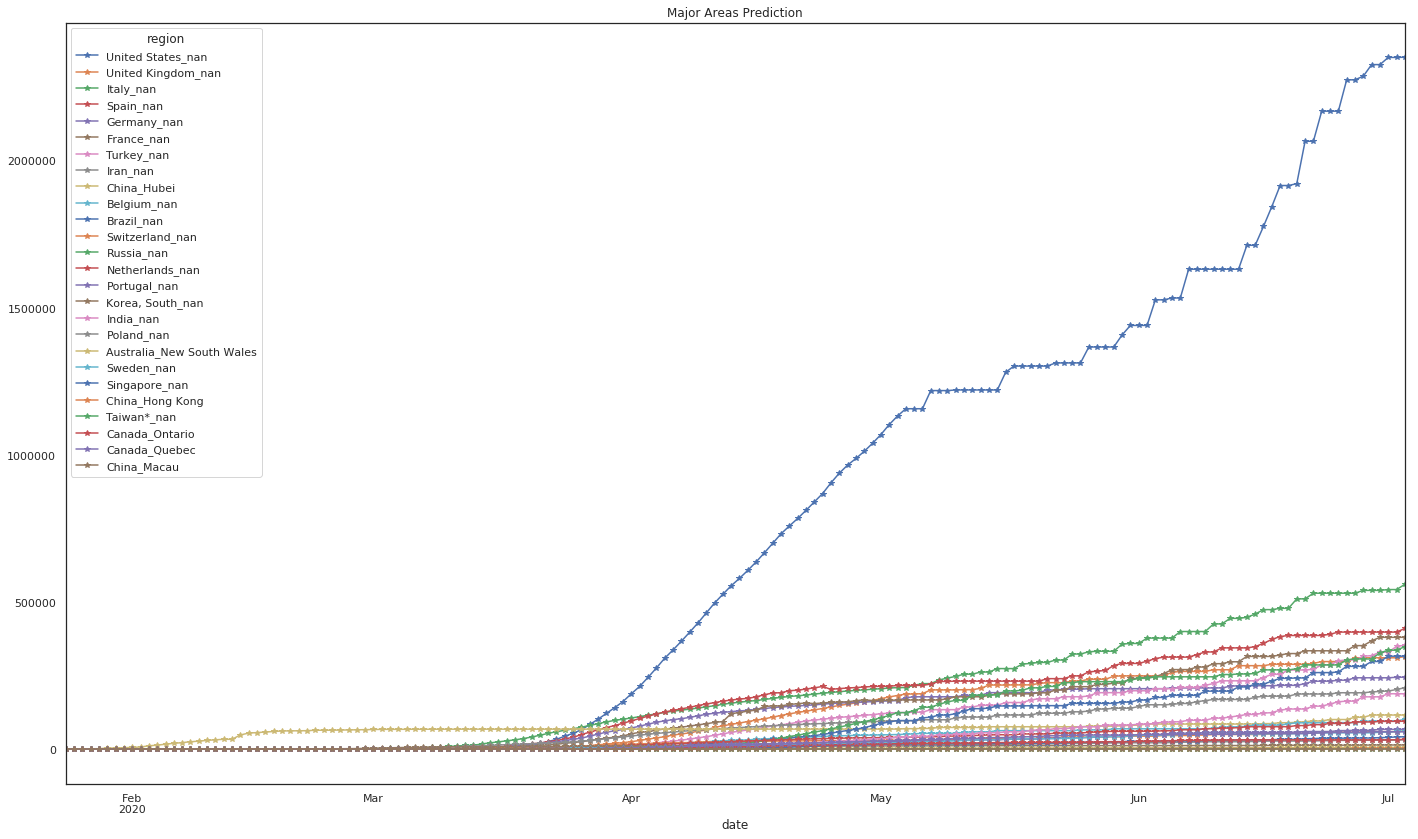

In [68]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

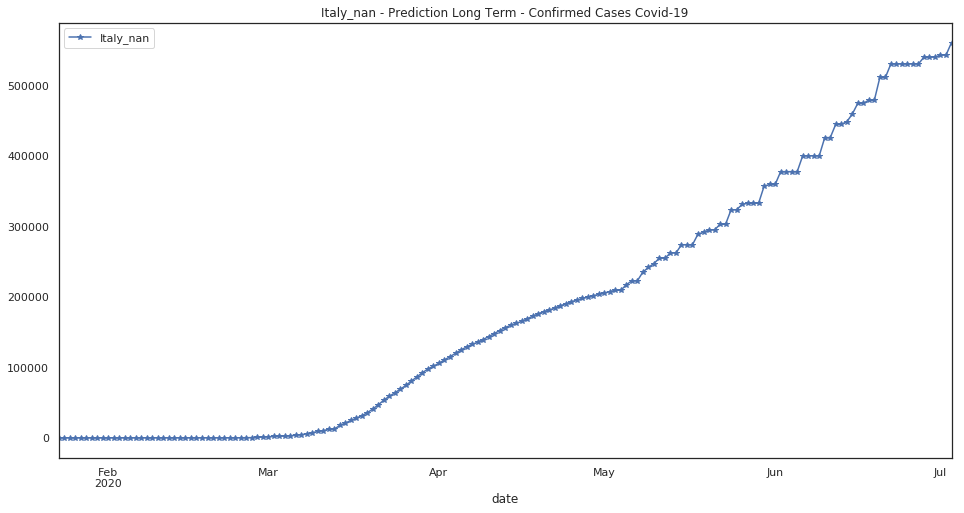

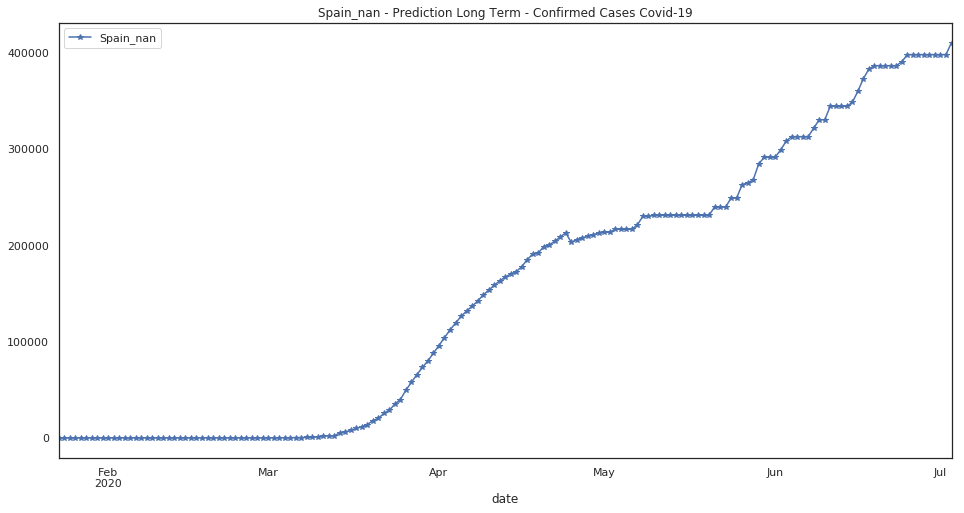

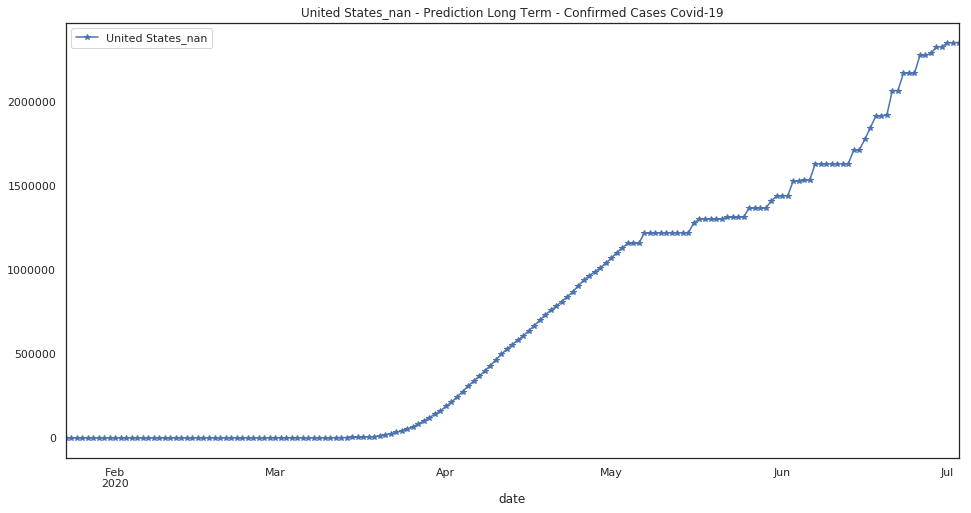

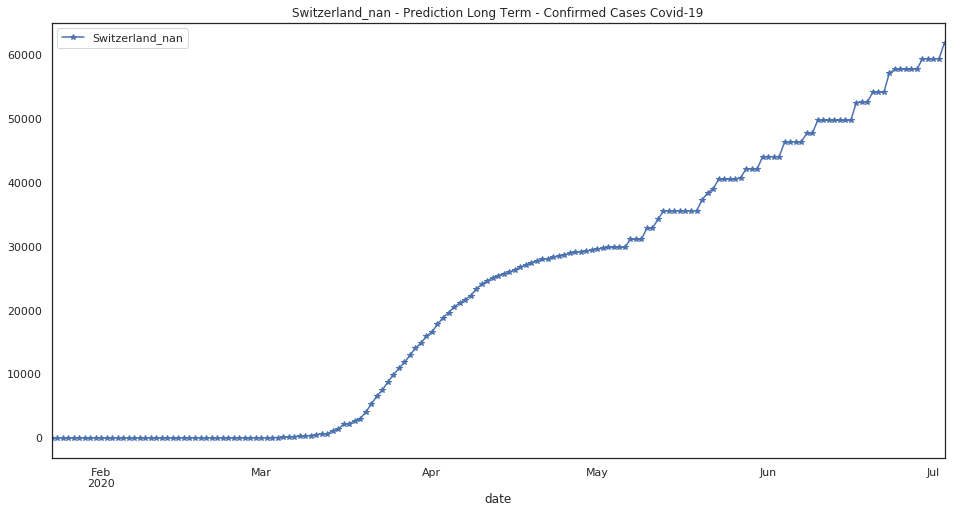

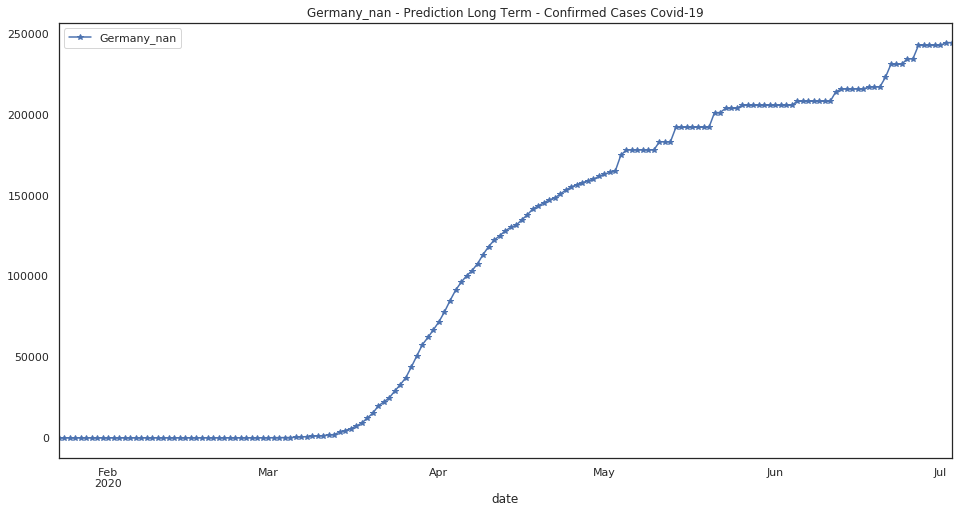

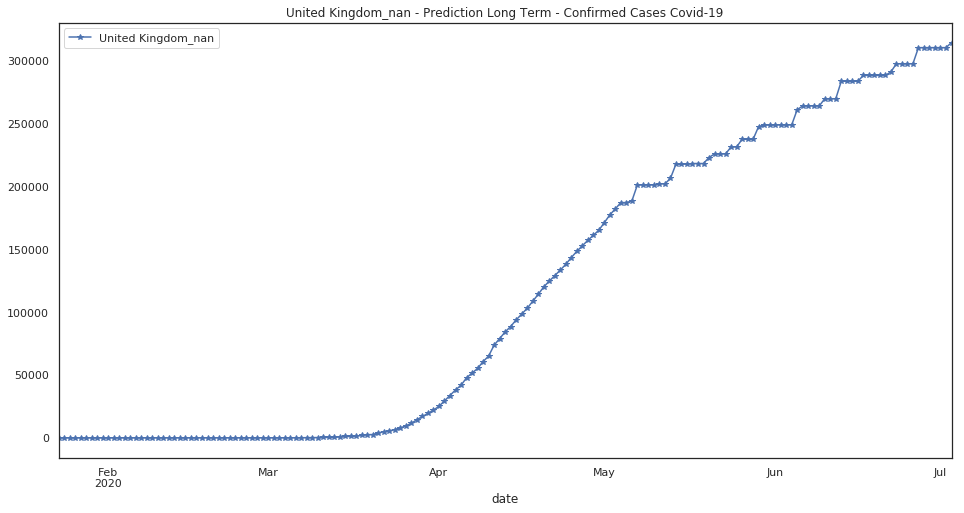

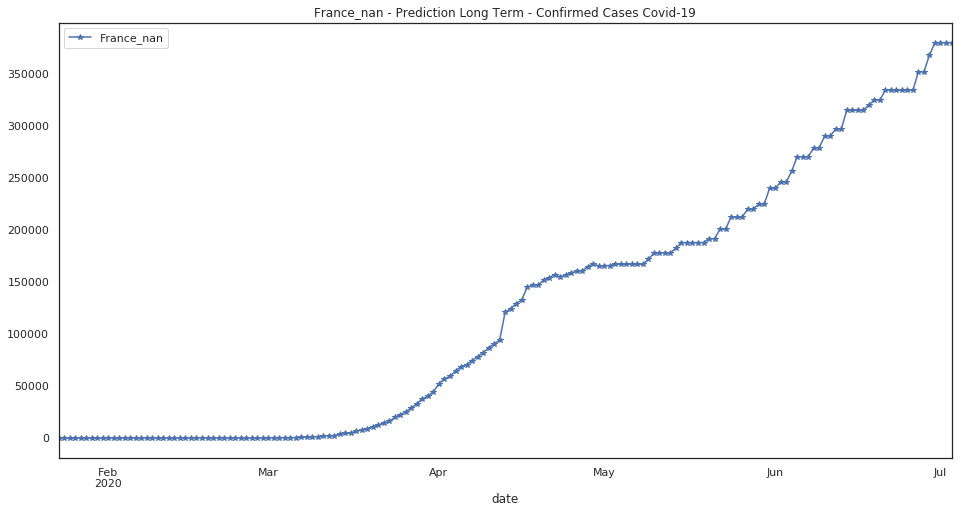

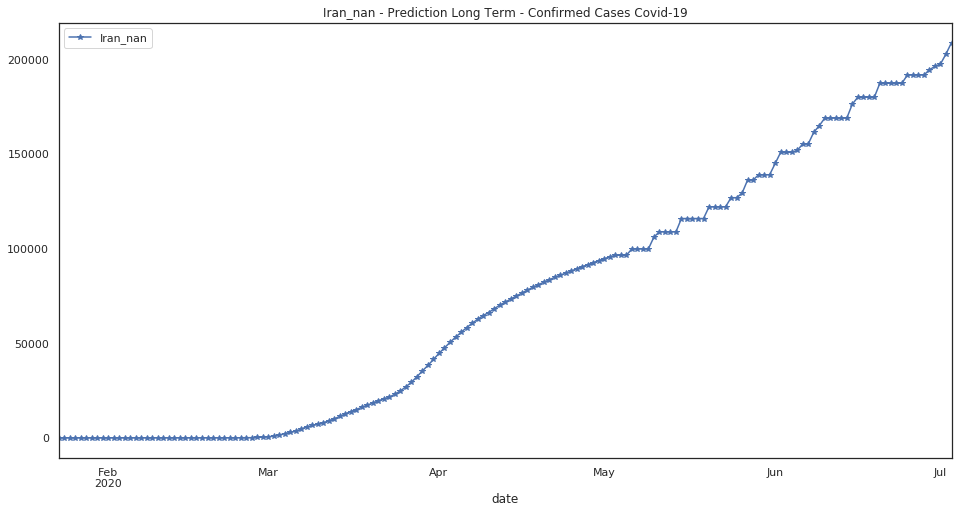

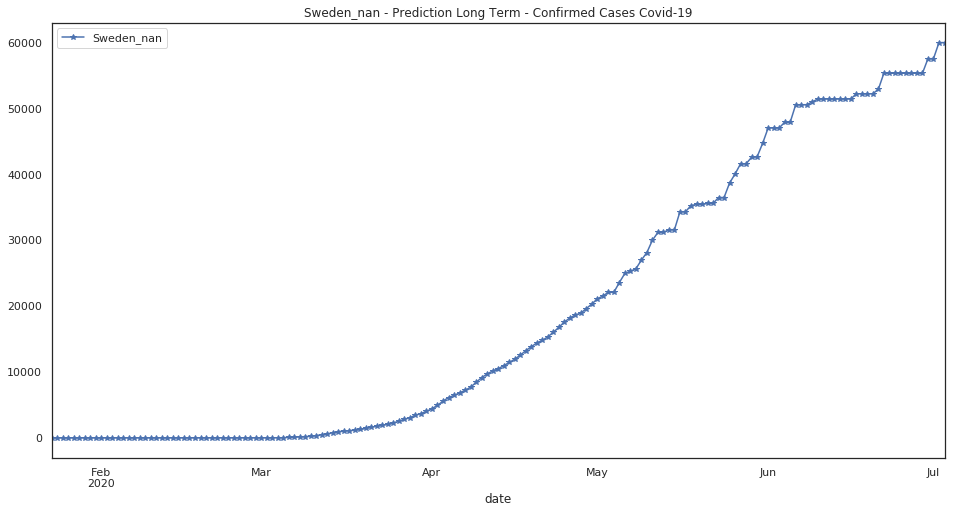

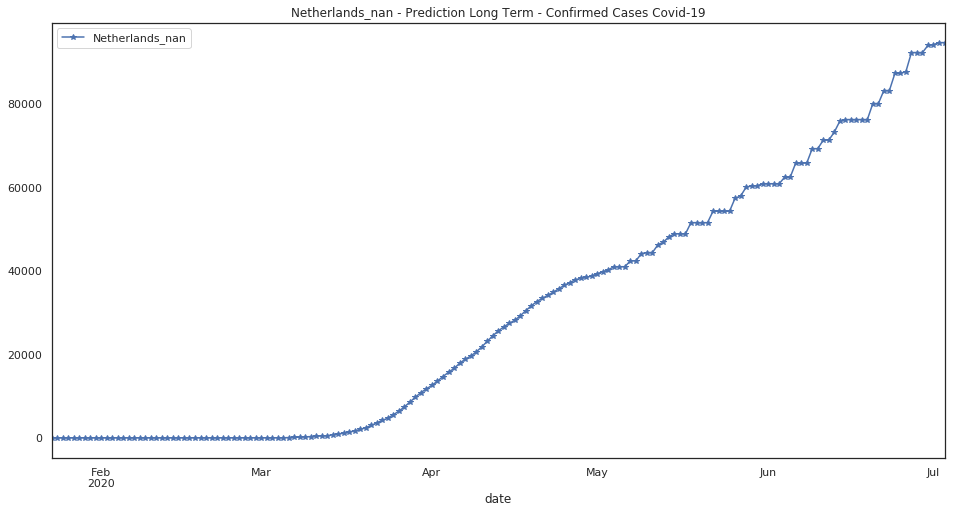

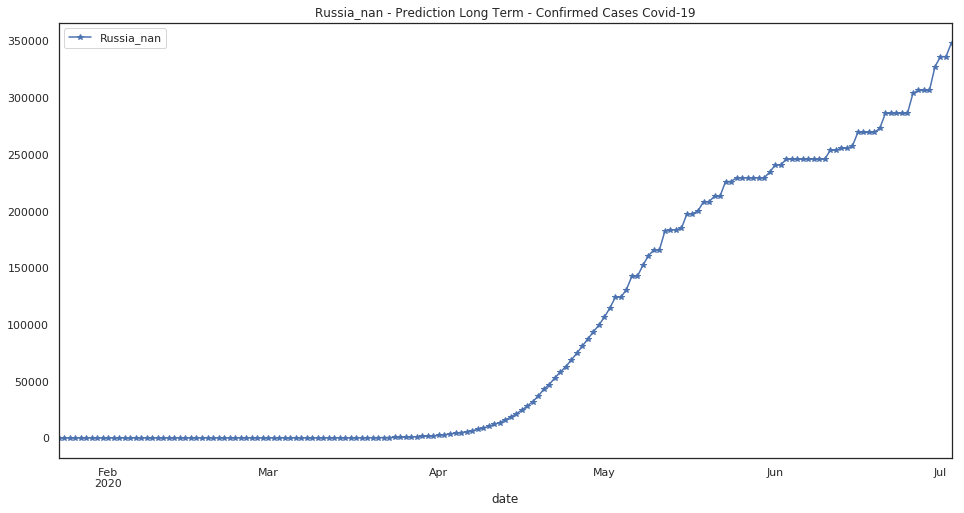

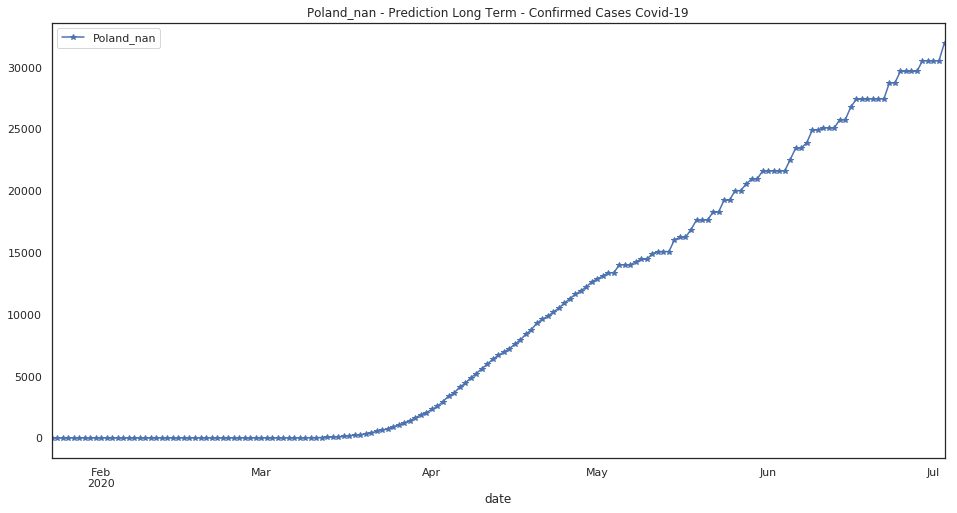

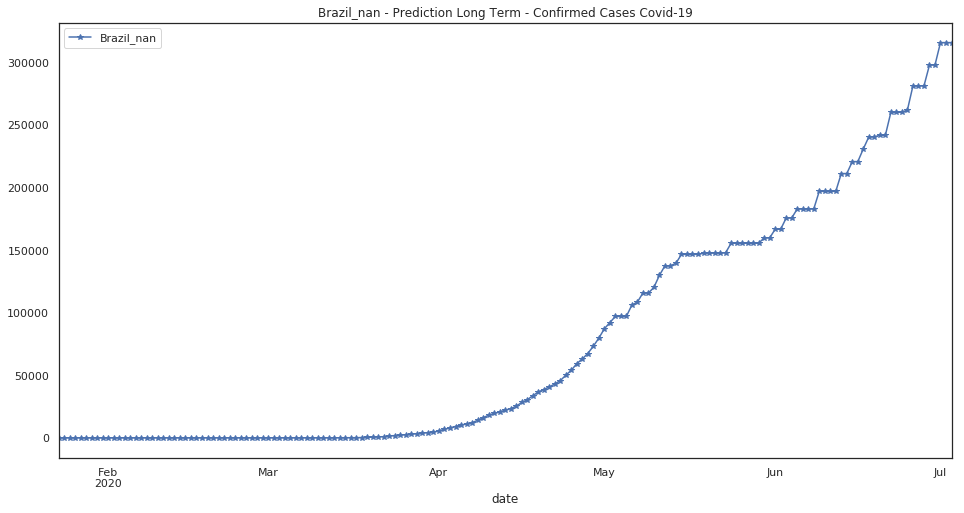

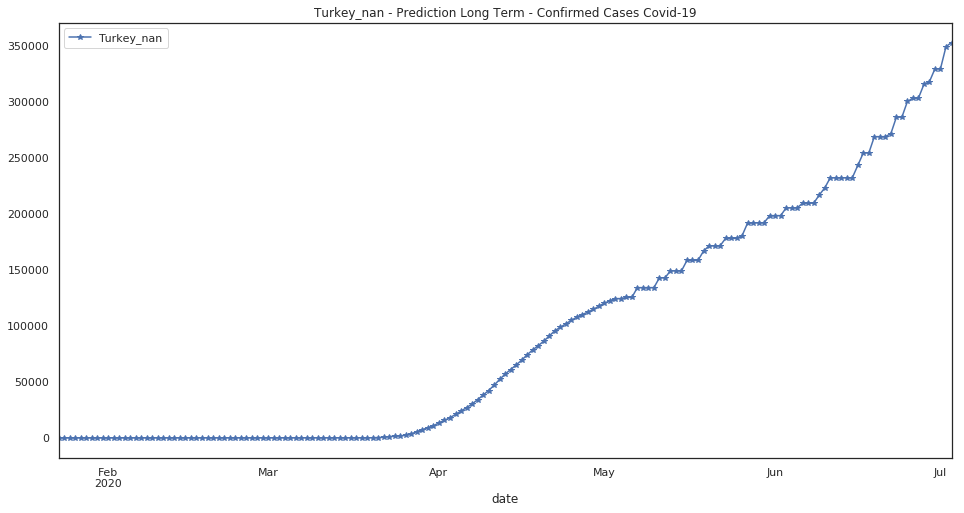

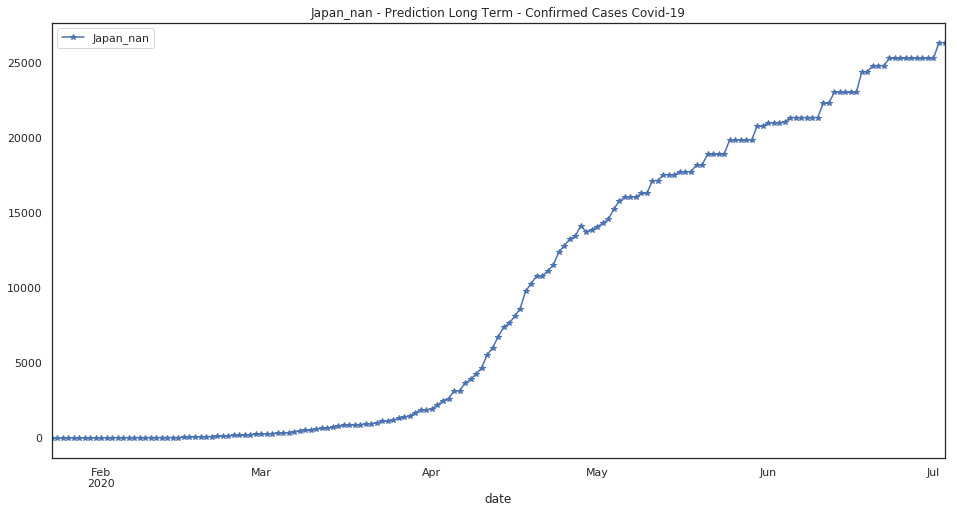

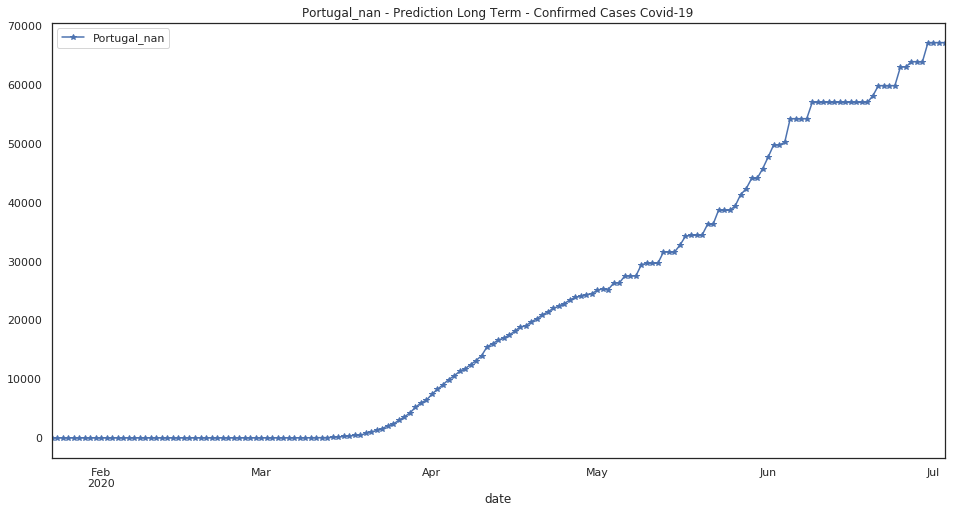

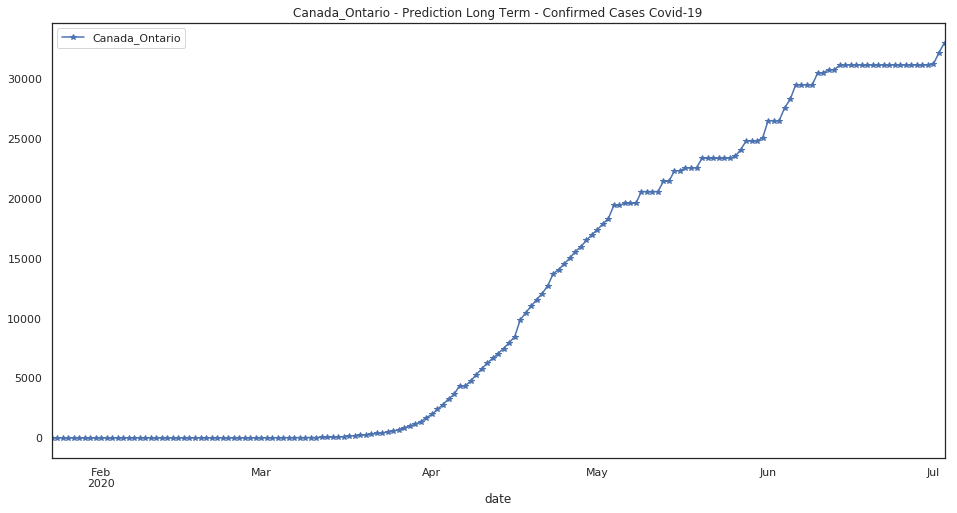

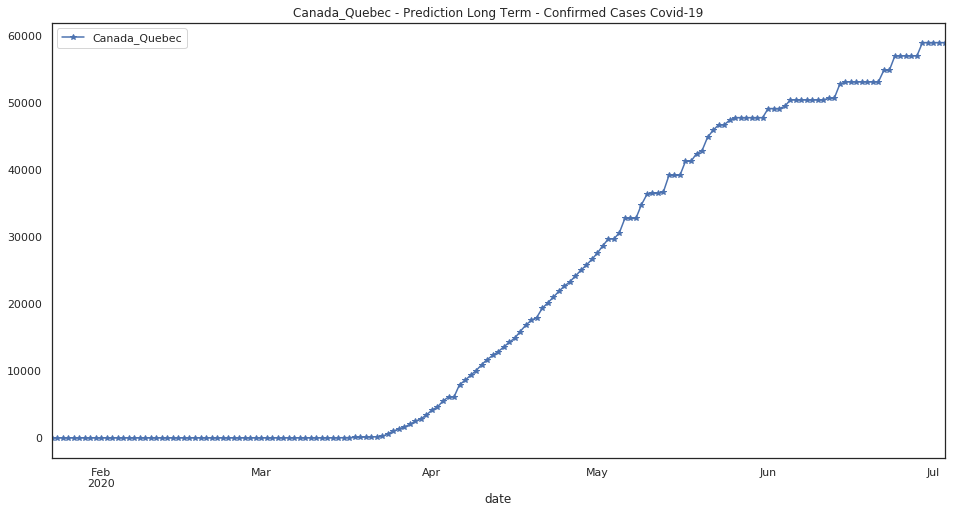

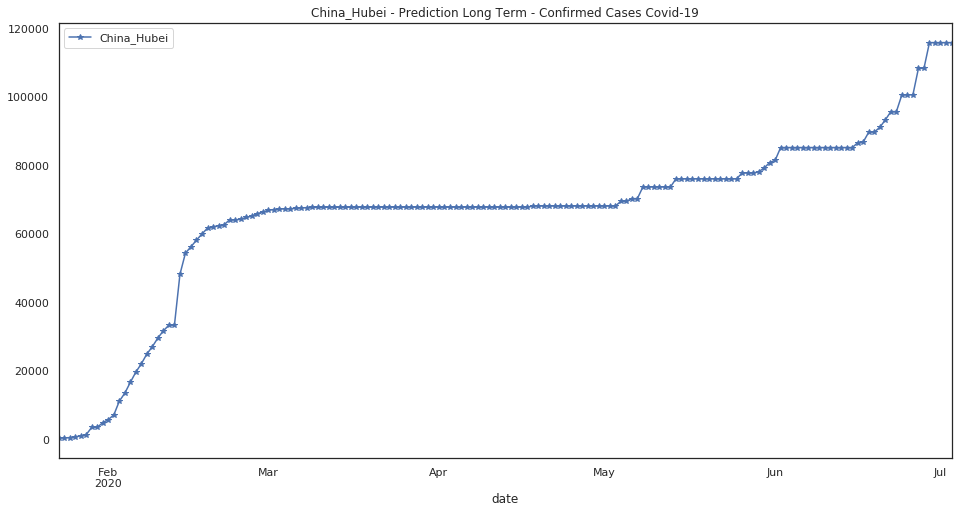

In [69]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[1:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

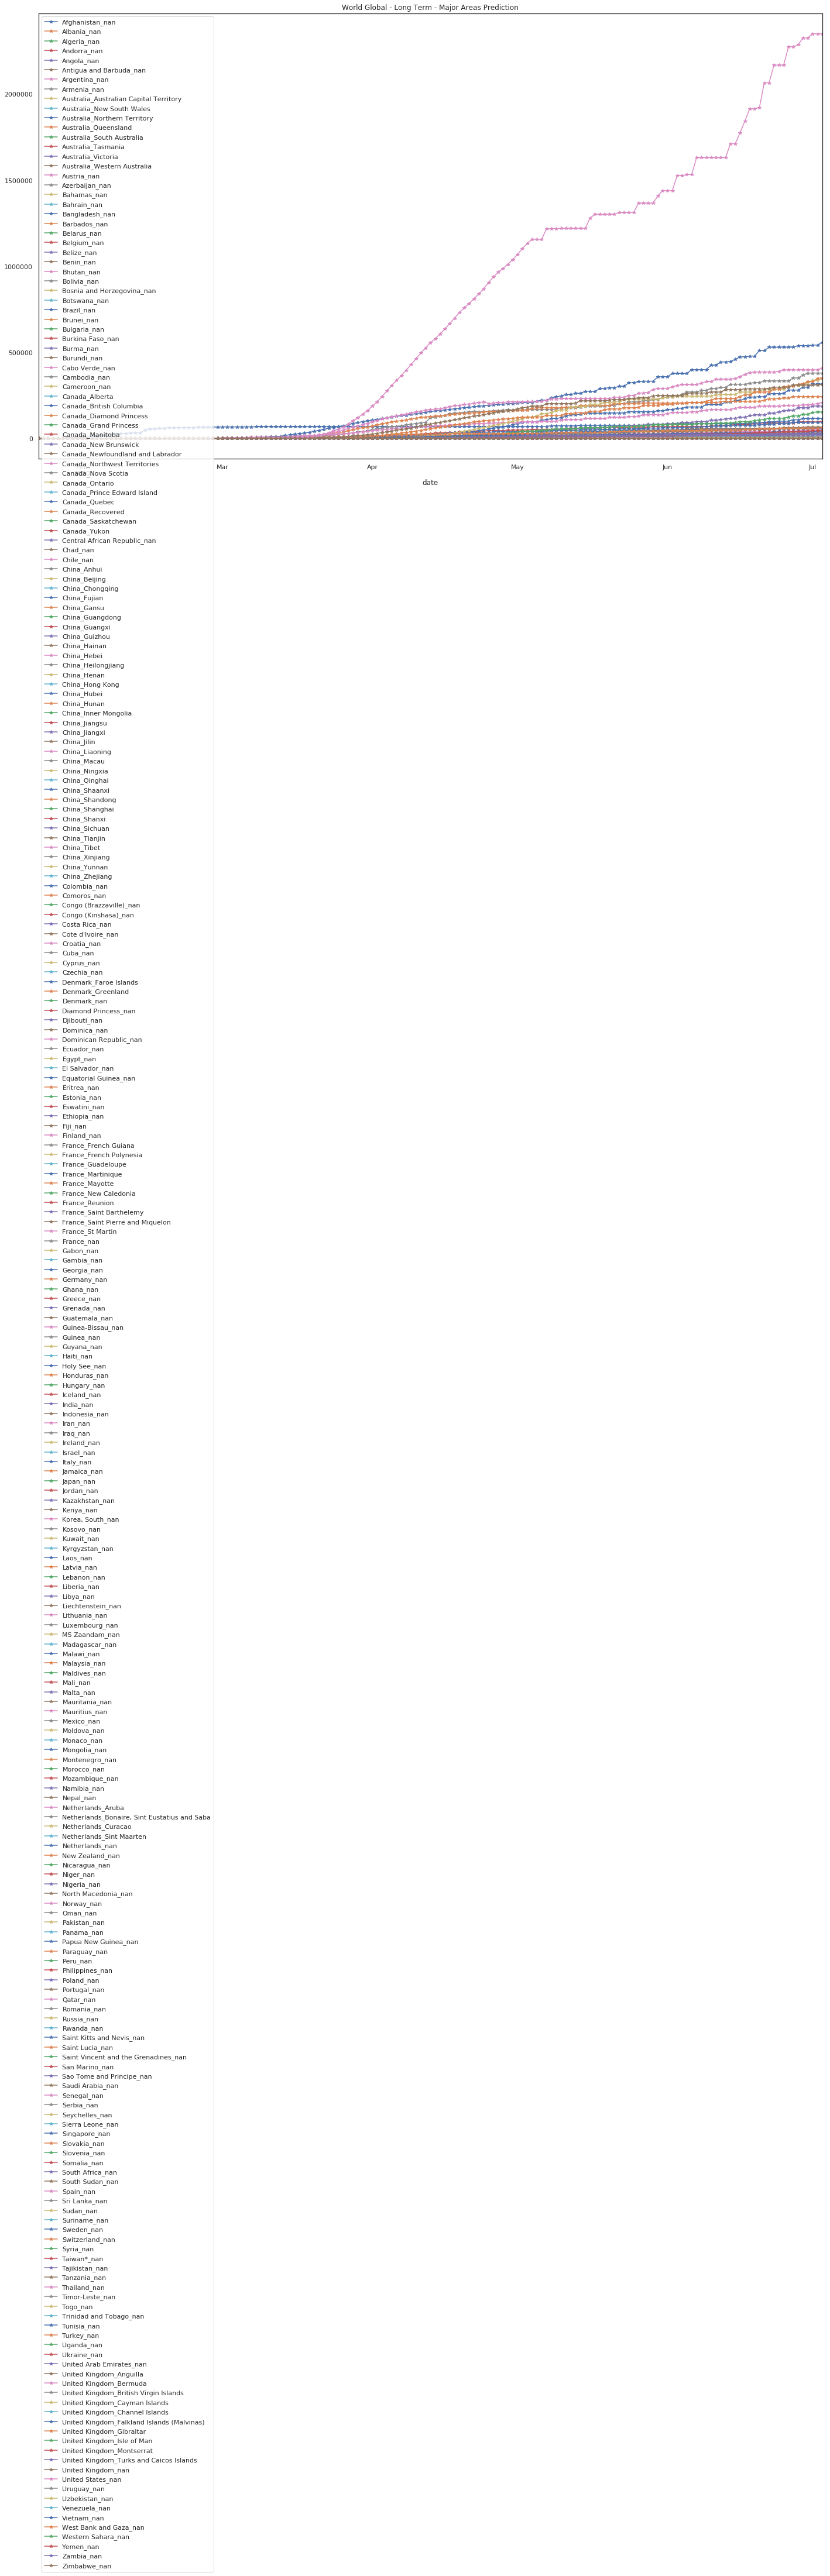

In [70]:
#region=my_train_list
pv2=pred
pv2[1:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [71]:
pv1=pv2[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [72]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
2020-03-19             22.0         59.0         74.0         39.0   
2020-03-20             22.0         64.0         87.0         53.0   
2020-03-21             24.0         70.0         90.0         75.0   
2020-03-22             24.0         76.0        139.0         88.0   
2020-03-23             40.0         89.0        201.0        113.0   
2020-03-24             40.0        104.0        230.0        133.0   
2020-03-25             74.0        123.0        264.0        164.0   
2020-03-26             84.0        146.0        302.0        188.0   
2020-03-27             94.0        174.0        367.0        224.0   
2020-03-28            110.0        186.0        409.0        267.0   
2020-03-29            110.0        197.0        454.0        308.0   
2020-03-30            120.0        212.0        511.0        334.0   
2020-03-31            170.0        223.0        584.0        370.0   
2020-04-01            174.0        243.0        716.0        376.0   
2020-04-02            237.0        259.0        847.0        390.0   
2020-04-03            273.0        277.0        986.0        428.0   
2020-04-04            281.0        304.0       1171.0        439.0   
2020-04-05            299.0        333.0       1251.0        466.0   
2020-04-06            349.0        361.0       1320.0        501.0   
...                     ...          ...          ...          ...   
2020-06-04           3791.0       1106.0       7589.0        958.0   
2020-06-05           3791.0       1133.0       7589.0       1015.0   
2020-06-06           3987.0       1133.0       8020.0       1015.0   
2020-06-07           3987.0       1133.0       8221.0       1015.0   
2020-06-08           3987.0       1170.0       8221.0       1031.0   
2020-06-09           3987.0       1170.0       8221.0       1083.0   
2020-06-10           4260.0       1182.0       8713.0       1083.0   
2020-06-11           4260.0       1182.0       8713.0       1094.0   
2020-06-12           4260.0       1182.0       9097.0       1094.0   
2020-06-13           4260.0       1195.0       9161.0       1118.0   
2020-06-14           4378.0       1210.0       9161.0       1118.0   
2020-06-15           4406.0       1210.0       9706.0       1156.0   
2020-06-16           4547.0       1210.0       9706.0       1156.0   
2020-06-17           4547.0       1210.0      10335.0       1156.0   
2020-06-18           4685.0       1244.0      10815.0       1176.0   
2020-06-19           4685.0       1248.0      10911.0       1219.0   
2020-06-20           4957.0       1248.0      10911.0       1219.0   
2020-06-21           4957.0       1248.0      10911.0       1259.0   
2020-06-22           4957.0       1248.0      11843.0       1259.0   
2020-06-23           4957.0       1315.0      12101.0       1309.0   
2020-06-24           5140.0       1315.0      12434.0       1309.0   
2020-06-25           5140.0       1315.0      12434.0       1309.0   
2020-06-26           5148.0       1330.0      12646.0       1309.0   
2020-06-27           5296.0       1333.0      13094.0       1326.0   
2020-06-28

In [73]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [74]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [75]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [76]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                              Canada_Recovered   0.000000    0.000000   
241                                      Laos_nan  19.856270  102.495496   
242                                     Libya_nan  26.335100   17.228331   
243                        West Bank and Gaza_nan  31.952200   35.233200   
244                             Guinea-Bissau_nan  11.803700  -15.180400   
245                                      Mali_nan  17.570692   -3.996166   
246                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
247                  Canada_Northwest Territories  64.825500 -124.845700   
248                                  Canada_Yukon  64.282300 -135.000000   
249                                    Kosovo_nan  42.602636   20.902977   
250                                     Burma_nan  21.916200   95.956000   
251                       United Kingdom_Anguilla  18.220600  -63.068600   
252         United Kingdom_British Virgin Islands  18.420700  -64.640000   
253       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
254                                MS Zaandam_nan   0.000000    0.000000   
255                                  Botswana_nan -22.328500   24.684900   
256                                   Burundi_nan  -3.373100   29.918900   
257                              Sierra Leone_nan   8.460555  -11.779889   
258  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
259            

In [77]:
#!pip install folium
import folium 

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]),sum(heatmap_m[heatmap_m.columns[3]] , heatmap_m[heatmap_m.columns[-1]] )):
    popup = folium.Popup( heatmap_m['region'][num]+' pred='+str(totpred)+' date='+date_pred , parse_html=True)
    use_color=heatmap_m['region'][num][0]
    #print('use_color=',use_color)
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [78]:
#
region_m2=region + ['Andorra_nan','Monaco_nan','San Marino_nan','Ireland_nan','Slovenia_nan','Slovakia_nan',
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Morocco_nan','Algeria_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    'Singapore_nan']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                     region      Lat      Long  2020-01-23 00:00:00  \
0       2                Algeria_nan  28.0339    1.6596                  0.0   
1       3                Andorra_nan  42.5063    1.5218                  0.0   
2       6              Argentina_nan -38.4161  -63.6167                  0.0   
3       9  Australia_New South Wales -33.8688  151.2093                  0.0   
4      23                Belgium_nan  50.8333    4.0000                  0.0   
5      28                 Brazil_nan -14.2350  -51.9253                  0.0   
6      42             Canada_Ontario  51.2538  -85.3232                  0.0   
7      44              Canada_Quebec  52.9399  -73.5491                  0.0   
8      48                  Chile_nan -35.6751  -71.5430                  0.0   
9      61            China_Hong Kong  22.3000  114.2000                  0.0   
10     62                China_Hubei  30.9756  112.2707                444.0   
11     69                China_Macau  22.1667  113.5500                  1.0   
12     82               Colombia_nan   4.5709  -74.2973                  0.0   
13     85             Costa Rica_nan   9.7489  -83.7534                  0.0   
14     87                Croatia_nan  45.1000   15.2000                  0.0   
15     94                Denmark_nan  56.2639    9.5018                  0.0   
16     97                Ecuador_nan  -1.8312  -78.1834                  0.0   
17    102                Estonia_nan  58.5953   25.0136                  0.0   
18    106                Finland_nan  64.0000   26.0000                  0.0   
19    116                 France_nan  46.2276    2.2137                  0.0   
20    121                Germany_nan  51.0000    9.0000                  0.0   
21    130                Hungary_nan  47.1625   19.5033                  0.0   
22    132                  India_nan  21.0000   78.0000                  0.0   
23    134                   Iran_nan  32.0000   53.0000                  0.0   
24    136                Ireland_nan  53.1424   -7.6921                  0.0   
25    137                 Israel_nan  31.0000   35.0000                  0.0   
26    138                  Italy_nan  43.0000   12.0000                  0.0   
27    140                  Japan_nan  36.0000  138.0000                  2.0   
28    144           Korea, South_nan  36.0000  128.0000                  1.0   
29    160                 Mexico_nan  23.6345 -102.5528                  0.0   
30    162                 Monaco_nan  43.7333    7.4167                  0.0   
31    165                Morocco_nan  31.7917   -7.0926                  0.0   
32    171            Netherlands_nan  52.1326    5.2913                  0.0   
33    177                 Norway_nan  60.4720    8.4689                  0.0   
34    185                 Poland_nan  51.9194   19.1451                  0.0   
35    186               Portugal_nan  39.3999   -8.2245                  0.0   
36    189                 Russia_nan  60.0000   90.0000                  0.0   
37    193             San Marino_nan  43.9424   12.4578                  0.0   
38    194           Saudi Arabia_nan  24.0000   45.0000                  0.0   
39    198              Singapore_nan   1.2833  103.8333                  0.0   
40    199               Slovakia_nan  48.6690   19.6990                  0.0   
41    200               Slovenia_nan  46.1512   14.9955                  0.0   
42    202           South Africa_nan -30.5595   22.9375                  0.0   
43    203                  Spain_nan  40.0000   -4.0000                  0.0   
44    207                 Sweden_nan  63.0000   16.0000                  0.0   
45    208            Switzerland_nan  46.8182    8.2275                  0.0   
46    209                Taiwan*_nan  23.7000  121.0000                  1.0   
47    215                 Turkey_nan  38.9637   35.2433                  0.0   
48    217                Ukraine_nan  48.3794   31.1656                  0.0   
49  

In [79]:
import folium 

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]),sum(heatmap_m2[heatmap_m2.columns[3]] , heatmap_m2[heatmap_m2.columns[-1]] )):
    use_color2=heatmap_m2['region'][num2][0]
    popup2 = folium.Popup( heatmap_m2['region'][num2]+' pred='+str(totpred2)+' date='+date_pred , parse_html=True)  
    #print('use_color=',use_color)
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [80]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [81]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [82]:
exit()

H2O session _sid_8e0a closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
